# Book Recommdation System for Goodreads dataset


## 1. EDA for dataset

In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
%matplotlib inline
sns.set_style('whitegrid')

In [2]:
import os
dataset_path = '../datasets/goodreads'
books_pd = pd.DataFrame(columns = pd.read_csv(os.path.join(dataset_path,'book1000k-1100k.csv')).columns)
print(books_pd)
users_pd = pd.DataFrame(columns = pd.read_csv(os.path.join(dataset_path,'user_rating_0_to_1000.csv')).columns)
print(users_pd)

Empty DataFrame
Columns: [Id, Name, Authors, ISBN, Rating, PublishYear, PublishMonth, PublishDay, Publisher, RatingDist5, RatingDist4, RatingDist3, RatingDist2, RatingDist1, RatingDistTotal, CountsOfReview, Language, pagesNumber, Description, Count of text reviews]
Index: []
Empty DataFrame
Columns: [ID, Name, Rating]
Index: []


In [3]:
import fnmatch
for dirname, _, filenames in os.walk('../datasets/goodreads'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        if fnmatch.fnmatch(filename, 'book*.csv'):
            books_pd = pd.concat([books_pd, pd.read_csv(os.path.join(dataset_path,filename))])
        if fnmatch.fnmatch(filename, 'user*.csv'):
            users_pd = pd.concat([users_pd, pd.read_csv(os.path.join(dataset_path,filename))])
books_pd.info(show_counts=True)

../datasets/goodreads/book600k-700k.csv
../datasets/goodreads/book1600k-1700k.csv
../datasets/goodreads/book200k-300k.csv
../datasets/goodreads/user_rating_0_to_1000.csv
../datasets/goodreads/book100k-200k.csv
../datasets/goodreads/book500k-600k.csv
../datasets/goodreads/book1-100k.csv
../datasets/goodreads/book1300k-1400k.csv
../datasets/goodreads/book800k-900k.csv
../datasets/goodreads/user_rating_6000_to_11000.csv
../datasets/goodreads/book1700k-1800k.csv
../datasets/goodreads/user_rating_4000_to_5000.csv
../datasets/goodreads/book1400k-1500k.csv
../datasets/goodreads/book1000k-1100k.csv
../datasets/goodreads/book2000k-3000k.csv
../datasets/goodreads/book400k-500k.csv
../datasets/goodreads/archive.zip
../datasets/goodreads/book900k-1000k.csv
../datasets/goodreads/user_rating_3000_to_4000.csv
../datasets/goodreads/book4000k-5000k.csv
../datasets/goodreads/book1100k-1200k.csv
../datasets/goodreads/user_rating_5000_to_6000.csv
../datasets/goodreads/book1800k-1900k.csv
../datasets/goodr

In [4]:
users_pd.info()
books_pd.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 362596 entries, 0 to 30632
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   ID      362596 non-null  object
 1   Name    362596 non-null  object
 2   Rating  362596 non-null  object
dtypes: object(3)
memory usage: 11.1+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1850310 entries, 0 to 54272
Data columns (total 21 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Id                     1850310 non-null  object 
 1   Name                   1850310 non-null  object 
 2   Authors                1850310 non-null  object 
 3   ISBN                   1844387 non-null  object 
 4   Rating                 1850310 non-null  float64
 5   PublishYear            1850310 non-null  object 
 6   PublishMonth           1850310 non-null  object 
 7   PublishDay             1850310 non-null  object 
 8   Publisher

In [5]:
users_pd.index.value_counts()
users_pd.reset_index(drop=True, inplace=True)

In [6]:
users_pd.index.value_counts()

0         1
241760    1
241736    1
241735    1
241734    1
         ..
120863    1
120862    1
120861    1
120860    1
362595    1
Length: 362596, dtype: int64

### 1.1 Check the books with duplicated names

In [7]:

books_pd['Name'].nunique()

1636235

In [8]:
books_pd[books_pd['Name'].duplicated(keep = False)].sort_values('Name')

,Id,Name,Authors,ISBN,Rating,PublishYear,PublishMonth,PublishDay,Publisher,RatingDist5,...,RatingDist3,RatingDist2,RatingDist1,RatingDistTotal,CountsOfReview,Language,pagesNumber,Description,Count of text reviews,PagesNumber
187321,3529667,"""A Trade Like Any Other"": Female Singers and D...",Karin van Nieuwkerk,0292787200,4.33,1995,1,1,University of Texas Press,5:26,...,3:9,2:0,1:0,total:52,0,NaN,NaN,"In Egypt, singing and dancing are considered e...",NaN,226.0
33743,560791,"""A Trade Like Any Other"": Female Singers and D...",Karin van Nieuwkerk,0292787235,4.33,1995,1,1,University of Texas Press,5:26,...,3:9,2:0,1:0,total:51,6,NaN,240,NaN,NaN,NaN
202956,3573192,"""Ace"" Any Test",Ron Fry,1564140792,2.95,1994,8,1,Career Press,5:0,...,3:7,2:5,1:1,total:19,0,NaN,NaN,"Testy on test day? Don't stress! ""ACE"" ANY TES...",NaN,128.0
145488,2340088,"""Ace"" Any Test",Ron Fry,1564144607,2.89,2000,7,1,Career Press,5:0,...,3:7,2:5,1:1,total:18,0,NaN,NaN,"Shows how to conquer test anxiety, manage time...",NaN,124.0
35550,362418,"""After Mecca"": Women Poets and the Black Arts ...",Cheryl Clark,0813534062,4.19,2004,24,11,Rutgers University Press,5:7,...,3:4,2:0,1:0,total:16,3,NaN,224,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4256,1210051,鹿鼎記（一）,Jin Yong,9573258064,4.29,2006,16,7,遠流出版事業股份有限公司,5:459,...,3:117,2:21,1:12,total:923,0,zho,472,奇書者，《鹿鼎記》是也。《鹿鼎記》奇在哪裡？奇在金庸的其他小說都有明顯的悲劇角色和故事，唯獨...,0,NaN
269,1500766,"�buen Viaje! Level 2, Student Edition",Protase E. Woodford,007861970X,3.60,2004,3,3,McGraw-Hill Education,5:0,...,3:2,2:0,1:0,total:5,0,NaN,493,�Buen viaje! is a comprehensive three-level pr...,0,NaN
10970,1734000,"�buen Viaje! Level 2, Student Edition",Protase E. Woodford,0078256828,3.00,2001,13,3,McGraw-Hill Education,5:0,...,3:1,2:0,1:0,total:1,0,NaN,536,Students continue building skills for proficie...,NaN,NaN
161298,4489958,"�umar Ibn Al-Farid: Sufi Verse, Saintly Life",'Umar Ibn 'Ali Ibn Al-Farid,0809105284,3.95,2001,5,1,Paulist Press,5:9,...,3:5,2:1,1:1,total:22,0,NaN,NaN,Umar Ibn al-Farid (b. 576 [hijri date]/1181 CE...,NaN,384.0


### 1.2 Check the fully duplicated books

In [9]:

books_pd[books_pd.duplicated(keep = False)].sort_values('Name')

,Id,Name,Authors,ISBN,Rating,PublishYear,PublishMonth,PublishDay,Publisher,RatingDist5,...,RatingDist3,RatingDist2,RatingDist1,RatingDistTotal,CountsOfReview,Language,pagesNumber,Description,Count of text reviews,PagesNumber
44129,76793,101 Essential Tips: Planning A Small Yard,John Brookes,NaN,3.20,1996,23,5,NaN,5:0,...,3:2,2:1,1:0,total:5,2,NaN,72,NaN,NaN,NaN
44242,76793,101 Essential Tips: Planning A Small Yard,John Brookes,NaN,3.20,1996,23,5,NaN,5:0,...,3:2,2:1,1:0,total:5,2,NaN,72,NaN,NaN,NaN
44123,76785,A Carra King (Inspector Matt Minogue #6),John Brady,1586420186,3.45,2015,15,10,NaN,5:6,...,3:13,2:4,1:3,total:44,6,eng,548,NaN,NaN,NaN
44235,76785,A Carra King (Inspector Matt Minogue #6),John Brady,1586420186,3.45,2015,15,10,NaN,5:6,...,3:13,2:4,1:3,total:44,6,eng,548,NaN,NaN,NaN
49815,85994,A New World Order,Anne-Marie Slaughter,0691123977,3.42,2005,7,8,Princeton University Press,5:19,...,3:23,2:14,1:6,total:86,7,NaN,368,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44140,76809,Wishful Thinking: A Theological ABC,Frederick Buechner,0060611391,4.29,1993,24,9,HarperOne,5:497,...,3:144,2:25,1:3,total:1028,63,NaN,144,NaN,NaN,NaN
49773,85931,Writings on Psychoanalysis: Freud and Lacan,Louis Althusser,0231101694,3.71,1999,3,3,Columbia University Press,5:16,...,3:21,2:4,1:2,total:66,0,NaN,208,NaN,NaN,NaN
49856,85931,Writings on Psychoanalysis: Freud and Lacan,Louis Althusser,0231101694,3.71,1999,3,3,Columbia University Press,5:16,...,3:21,2:4,1:2,total:66,0,NaN,208,NaN,NaN,NaN
44145,76814,"Young Miles (Vorkosigan Omnibus, #2)",Lois McMaster Bujold,0671877828,4.39,1997,1,6,Baen,5:3027,...,3:624,2:65,1:14,total:5784,13,eng,592,NaN,NaN,NaN


### 1.3 Drop the duplicated books

In [10]:
books_pd.drop_duplicates(inplace = True)
books_pd.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1850198 entries, 0 to 54272
Data columns (total 21 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Id                     1850198 non-null  object 
 1   Name                   1850198 non-null  object 
 2   Authors                1850198 non-null  object 
 3   ISBN                   1844276 non-null  object 
 4   Rating                 1850198 non-null  float64
 5   PublishYear            1850198 non-null  object 
 6   PublishMonth           1850198 non-null  object 
 7   PublishDay             1850198 non-null  object 
 8   Publisher              1832375 non-null  object 
 9   RatingDist5            1850198 non-null  object 
 10  RatingDist4            1850198 non-null  object 
 11  RatingDist3            1850198 non-null  object 
 12  RatingDist2            1850198 non-null  object 
 13  RatingDist1            1850198 non-null  object 
 14  RatingDistTotal     

In [11]:
books_pd.head()

,Id,Name,Authors,ISBN,Rating,PublishYear,PublishMonth,PublishDay,Publisher,RatingDist5,...,RatingDist3,RatingDist2,RatingDist1,RatingDistTotal,CountsOfReview,Language,pagesNumber,Description,Count of text reviews,PagesNumber
0,600000,"Lessons Learned (Great Chefs, #2)",Nora Roberts,037351025X,3.74,1993,15,2,Silhouette,5:947,...,3:1061,2:287,1:63,total:3374,86,eng,250,LESSONS LEARNED...<br /><br />Coordinating the...,NaN,NaN
1,600001,Walking by Faith: Lessons Learned in the Dark,Jennifer Rothschild,0633099325,4.27,2003,1,1,Lifeway Church Resources,5:367,...,3:109,2:22,1:5,total:749,7,NaN,112,"At the age of fifteen, Jennifer Rothschild con...",NaN,NaN
2,600003,Better Health in Africa: Experience and Lesson...,World Bank Group,0821328174,5.00,1994,1,1,World Bank Publications,5:1,...,3:0,2:0,1:0,total:1,1,NaN,240,NaN,NaN,NaN
3,600004,"The Blended Learning Book: Best Practices, Pro...",Josh Bersin,0787972967,4.10,2004,1,10,Pfeiffer,5:8,...,3:6,2:0,1:0,total:20,3,NaN,319,<i>The Blended Learning Book</i> is your user'...,NaN,NaN
4,600005,Lessons Learned: Successes Achieved: Be Prepar...,Robert G. Gillio,0595417566,3.00,2006,30,11,iUniverse,5:0,...,3:1,2:0,1:0,total:1,0,NaN,168,"""<b>Lessons Learned: Successes Achieved</b>"" w...",NaN,NaN


### 1.4 See the popular names of books

/home/jin/miniconda3/envs/mle_capstone/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Number of books')

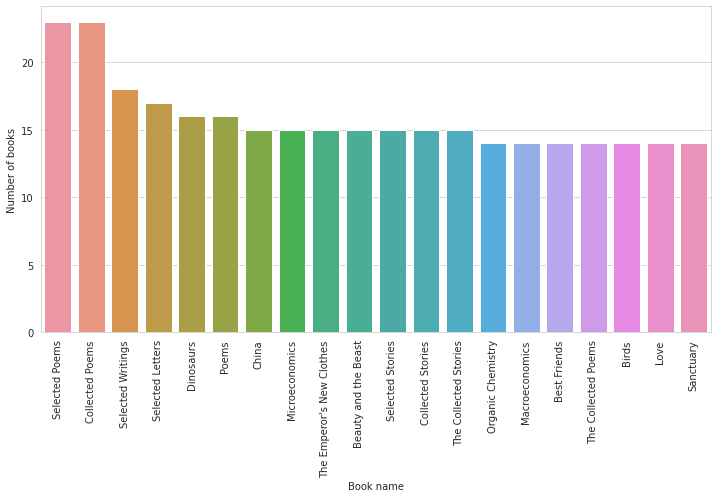

In [12]:
plt.figure(figsize = (12,6))
popular_names = sns.barplot(books_pd[~books_pd[['Name', 'Authors']].duplicated()]['Name'].value_counts().head(20).index, books_pd[~books_pd[['Name', 'Authors']].duplicated()]['Name'].value_counts().head(20).values)
popular_names.set_xticklabels(popular_names.get_xticklabels(), rotation=90)
popular_names.set_xlabel('Book name')
popular_names.set_ylabel('Number of books')

### Which books have the most published editions
#### "Jane Eyre" and "The Scarlet Letter" have 20 different published editions

In [13]:
books_pd[books_pd[['Name', 'Authors']].duplicated()]['Name'].value_counts().head(20)

Jane Eyre               20
The Scarlet Letter      20
The Prince              19
Madame Bovary           19
Hamlet                  19
Mansfield Park          19
Northanger Abbey        18
Little Women            18
Frankenstein            18
The Age of Innocence    18
The Art of War          18
Robinson Crusoe         17
The Secret Garden       17
Bleak House             17
Middlemarch             17
Othello                 17
A Christmas Carol       17
Treasure Island         17
Great Expectations      17
Wuthering Heights       17
Name: Name, dtype: int64

### 1.5 Authors
#### It appears that "Anonymous" is the most fruitable writer. However, the real person who writes the most books is Shakespeare

In [14]:
books_pd['Authors'].nunique()

675289

In [15]:
name_authors=books_pd[['Name', 'Authors']].drop_duplicates()
books_cnt = name_authors.groupby('Authors').size().sort_values(ascending=False)
books_cnt.head(20)

Authors
Anonymous                             2655
Unknown                               1987
National Research Council              881
Cram101 Textbook Reviews               876
Fodor's Travel Publications Inc.       846
William Shakespeare                    784
Francine Pascal                        769
Various                                732
Harold Bloom                           708
Hal Leonard Publishing Company         584
Isaac Asimov                           577
Walt Disney Company                    574
Carolyn Keene                          569
NOT A BOOK                             551
R.L. Stine                             527
Agatha Christie                        526
Enid Blyton                            463
Time-Life Books                        444
Ann M. Martin                          421
Alfred A. Knopf Publishing Company     407
dtype: int64

In [16]:
print(name_authors[name_authors['Authors']=='William Shakespeare'])

                                                    Name              Authors
729                                     Macbeth / Hamlet  William Shakespeare
730    Romeo y Julieta/Macbeth/Hamlet/Otelo/La fierec...  William Shakespeare
735                                    Macbeth / Macbeth  William Shakespeare
736    Macbeth. El Mercader de Venecia. Las Alegres C...  William Shakespeare
739                                               Hamlet  William Shakespeare
...                                                  ...                  ...
40359  Comedies, Histories, and Tragedies 1664 Editio...  William Shakespeare
40360  Comedies, Histories, and Tragedies 1623 Editio...  William Shakespeare
40361  Comedies, Histories, and Tragedies 1685 Editio...  William Shakespeare
40362  Comedies, Histories, and Tragedies 1632 Editio...  William Shakespeare
47250      To Be or Not To Be: Shakespeare's Soliloquies  William Shakespeare

[784 rows x 2 columns]


### 1.6 ISBN

In [17]:
books_pd[books_pd['ISBN'].isnull()]

,Id,Name,Authors,ISBN,Rating,PublishYear,PublishMonth,PublishDay,Publisher,RatingDist5,...,RatingDist3,RatingDist2,RatingDist1,RatingDistTotal,CountsOfReview,Language,pagesNumber,Description,Count of text reviews,PagesNumber
219,600399,"The Search for the Silver Persian (Nancy Drew,...",Carolyn Keene,NaN,3.76,1993,1,8,Aladdin Paperbacks,5:59,...,3:73,2:18,1:1,total:221,4,NaN,160,NaN,NaN,NaN
220,600400,The Case of the Safecracker's Secret (Nancy Dr...,Carolyn Keene,NaN,3.80,1990,1,2,Aladdin Paperbacks,5:61,...,3:75,2:11,1:3,total:223,4,NaN,154,Someone has broken into the safety depository ...,NaN,NaN
932,601648,Les Magiciennes,Boileau-Narcejac,NaN,3.24,1957,1,8,Editions Denoel,5:3,...,3:21,2:8,1:1,total:49,0,fre,184,"Quand meurt le professeur Alberto, un prestigi...",NaN,NaN
1067,601870,"Dangerous To Trust (Spies, Lies & Lovers, #1)",Sally Tyler Hayes,NaN,3.91,2017,21,3,Teresa Hill,5:106,...,3:75,2:20,1:5,total:282,29,NaN,255,NaN,NaN,NaN
1998,603392,A Season Beyond a Kiss,Kathleen E. Woodiwiss,NaN,3.86,2000,29,2,William Morrow Paperbacks,5:815,...,3:594,2:186,1:63,total:2422,47,eng,500,<i>Librarian's note: Alternate cover edition o...,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51165,794444,"Annihilation (Transformers, #2)",David Cian,NaN,3.27,2003,28,10,iBooks,5:7,...,3:14,2:10,1:1,total:41,2,NaN,320,The world is at war-and the Transformers are a...,2,NaN
51224,794561,"The Loves of Charles II (Stuart Saga, #2-4)",Jean Plaidy,NaN,3.92,2005,25,10,Crown Publishing Group,5:155,...,3:132,2:25,1:4,total:499,17,NaN,608,<b>From princesses to country girls to actress...,17,NaN
51706,795474,The Moche Warrior (Lara McClintoch Archeologic...,Lyn Hamilton,NaN,3.60,2013,12,6,Bev Editions,5:76,...,3:166,2:32,1:8,total:448,28,eng,336,NaN,28,NaN
52089,796214,The Robber Barons,Matthew Josephson,NaN,3.82,1962,24,1,Mariner Books,5:67,...,3:56,2:19,1:6,total:245,23,eng,496,"John D. Rockefeller, J. P. Morgan, Cornelius V...",23,NaN


### 1.7 Ratings

In [18]:
books_pd['Rating'].describe()

count    1.850198e+06
mean     2.894194e+00
std      1.725043e+00
min      0.000000e+00
25%      2.000000e+00
50%      3.680000e+00
75%      4.000000e+00
max      5.000000e+00
Name: Rating, dtype: float64

(array([4.51777e+05, 0.00000e+00, 0.00000e+00, 0.00000e+00, 6.31800e+03,
        1.20000e+02, 1.23000e+03, 1.86000e+02, 2.05920e+04, 4.26800e+03,
        1.85010e+04, 1.45610e+04, 1.22608e+05, 1.07795e+05, 2.33221e+05,
        2.57864e+05, 3.38714e+05, 1.17243e+05, 6.58870e+04, 8.93130e+04]),
 array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 ,
        2.75, 3.  , 3.25, 3.5 , 3.75, 4.  , 4.25, 4.5 , 4.75, 5.  ]),
 <BarContainer object of 20 artists>)

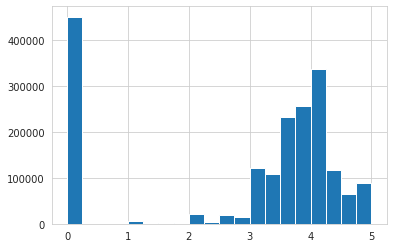

In [19]:
plt.hist(books_pd['Rating'], bins=20)

In [20]:
books_pd[books_pd['Rating']==0]

,Id,Name,Authors,ISBN,Rating,PublishYear,PublishMonth,PublishDay,Publisher,RatingDist5,...,RatingDist3,RatingDist2,RatingDist1,RatingDistTotal,CountsOfReview,Language,pagesNumber,Description,Count of text reviews,PagesNumber
5,600006,Charting Your Course: Lessons Learned During t...,John G. Conyers,0873896076,0.0,2003,9,12,ASQ Quality Press,5:0,...,3:0,2:0,1:0,total:0,0,NaN,174,NaN,NaN,NaN
11,600013,Small Specimen Test Techniques (ASTM Special T...,Nev.) Symposium on Small Specimen Test Techniq...,0803128975,0.0,2002,28,8,ASTM,5:0,...,3:0,2:0,1:0,total:0,0,NaN,494,NaN,NaN,NaN
12,600014,Genre and Void: Looking Back at Sartre and Bea...,Max Deutscher,0754632962,0.0,2003,20,8,Ashgate Publishing,5:0,...,3:0,2:0,1:0,total:0,0,NaN,268,Developing a reading of some of Beauvoir and S...,NaN,NaN
13,600016,Laser Diode Technology and Applications III,Daniel Renner,0819405086,0.0,1991,1,6,SPIE-International Society for Optical Enginee...,5:0,...,3:0,2:0,1:0,total:0,0,NaN,499,NaN,NaN,NaN
14,600018,Calendar of Inquisitions Post-Mortem and Other...,J.L. Kirby,0851158994,0.0,2002,8,12,Boydell Press,5:0,...,3:0,2:0,1:0,total:0,0,NaN,480,This volume of the Calendar of Inquisitions Po...,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54241,799936,Integral Yoga Psychology,V. Madhusudan Reddy,0941524922,0.0,1990,1,2,Lotus Press (WI),5:0,...,3:0,2:0,1:0,total:0,0,NaN,170,"This very important work, written by V. Madhus...",0,NaN
54242,799937,Yoga Psychology: The Science of the Inward Con...,Robert C. Leslie,0595393683,0.0,2006,24,4,iUniverse,5:0,...,3:0,2:0,1:0,total:0,0,NaN,152,You are not who you think you are! Here you ca...,0,NaN
54260,799980,Great Fugues for Solo Keyboard,David Dutkanicz,0486457273,0.0,2007,15,3,Dover Publications,5:0,...,3:0,2:0,1:0,total:0,0,NaN,112,Familiar from its use as a method of teaching ...,0,NaN
54267,799990,Favorite Opera Highlights for Solo Piano,Albert H. Stanley,0486446336,0.0,2005,26,8,Dover Publications,5:0,...,3:0,2:0,1:0,total:0,0,NaN,128,The difficulty in choosing great music from op...,0,NaN


### 1.8 Published year month and day

In [21]:
books_pd['PublishYear'] = books_pd['PublishYear'].astype('int')
books_pd['PublishMonth'] = books_pd['PublishMonth'].astype('int')
books_pd['PublishDay'] = books_pd['PublishDay'].astype('int')

(array([1.850189e+06, 0.000000e+00, 0.000000e+00, 6.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 3.000000e+00]),
 array([1.00000e+00, 6.55440e+03, 1.31078e+04, 1.96612e+04, 2.62146e+04,
        3.27680e+04, 3.93214e+04, 4.58748e+04, 5.24282e+04, 5.89816e+04,
        6.55350e+04]),
 <BarContainer object of 10 artists>)

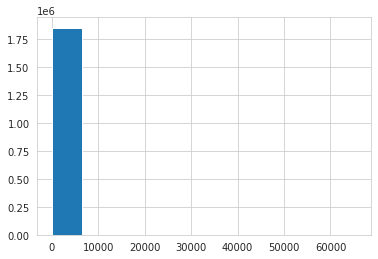

In [22]:
plt.hist(books_pd['PublishYear'])

In [23]:
books_pd[books_pd['PublishYear']>2021]

,Id,Name,Authors,ISBN,Rating,PublishYear,PublishMonth,PublishDay,Publisher,RatingDist5,...,RatingDist3,RatingDist2,RatingDist1,RatingDistTotal,CountsOfReview,Language,pagesNumber,Description,Count of text reviews,PagesNumber
32271,657982,"Ultimate X-Men, Volume 5: Ultimate War",Mark Millar,1904159443,3.79,20040,31,8,Panini UK,5:715,...,3:696,2:176,1:53,total:2366,2,eng,112,The Ultimates vs. the Ultimate X-Men: the batt...,NaN,NaN
31274,1694730,Global Politics: A New Introduction,Jenny Edkins,0415431301,3.62,20099,1,1,Routledge,5:15,...,3:21,2:3,1:4,total:64,0,NaN,568,Global Politics: A New Introduction is an inno...,0,NaN
45624,582684,The graphic work of M.C. Escher,M.C. Escher,NaN,3.91,4989,1,1,Taco,5:26498,...,3:10937,2:4388,1:4197,total:62435,0,eng,16,NaN,NaN,NaN
25597,42574,The Water Babies: A Fairy Tale for a Land Baby,Charles Kingsley,0543956121,3.42,3002,21,8,Adamant Media Corporation,5:1711,...,3:2379,2:1132,1:494,total:7645,0,NaN,372,NaN,NaN,NaN
23871,1359960,Guidance For Women In Twelfth Century Convents,Jocelyn Wogan-Browne,0859918254,4.00,2100,6,11,Brewer,5:0,...,3:0,2:0,1:0,total:2,0,NaN,203,A significant and lasting contribution to the ...,0,NaN
14830,1746177,"La femme de guerre (Les colonnes du ciel, #3)",Bernard Clavel,2266136682,3.31,65535,20,11,Pocket,5:2,...,3:7,2:2,1:0,total:13,0,fre,270,"En cette année 1639, quel contraste entre la F...",NaN,NaN
5049,1012420,Jared Grace's How-to-Draw Book,Benjamin Harper,1416949526,0.00,2030,31,12,Simon Scribbles,5:0,...,3:0,2:0,1:0,total:0,0,NaN,48,The <em>Spiderwick Stained Glass Book</em> fea...,0,NaN
46191,2102912,Le Sang noir,Louis Guilloux,2070230570,3.99,2035,10,11,Gallimard,5:56,...,3:26,2:13,1:2,total:159,0,NaN,NaN,"""Il luogo dove si svolge la vicenda di SANGUE ...",NaN,515.0
122581,2283161,La Normandie Avant Les Normands: De La Conquê...,Elisabeth Deniaux,2737311179,0.00,2202,9,16,Ouest-France,5:0,...,3:0,2:0,1:0,total:0,0,fre,NaN,NaN,NaN,448.0
130018,2301252,China (National Geographic Countries of the Wo...,Jen Green,0792275756,3.44,2030,12,31,National Geographic Children's Books,5:3,...,3:4,2:2,1:0,total:9,0,NaN,NaN,National Geographic invites you to journey thr...,NaN,64.0


In [24]:
books_pd[books_pd['PublishYear']<1900]

,Id,Name,Authors,ISBN,Rating,PublishYear,PublishMonth,PublishDay,Publisher,RatingDist5,...,RatingDist3,RatingDist2,RatingDist1,RatingDistTotal,CountsOfReview,Language,pagesNumber,Description,Count of text reviews,PagesNumber
37378,667209,The Comic History of Rome,Gilbert Abbott à Beckett,0865163332,2.92,1852,1,1,Bolchazy-Carducci Publishers,5:2,...,3:2,2:1,1:4,total:13,0,eng,308,"Beckett's The Comic History of Rome, first pub...",NaN,NaN
52800,695821,The Neandertals: Changing the Image of Mankind,Erik Trinkaus,1597402206,3.86,1899,31,12,ACLS History E-Book Project,5:10,...,3:16,2:1,1:0,total:59,0,NaN,484,"In 1856, at the very time when Charles Darwin ...",NaN,NaN
6751,1620672,Poetical Works of Thomas Hood,Thomas Hood,NaN,4.00,1895,1,1,Reprint Services Corp,5:6,...,3:3,2:0,1:1,total:17,0,eng,615,To Hope; The Departure of Summer;The Sea of De...,0,NaN
20849,1663365,The Carolingian Renaissance and the Idea of Ki...,Walter Ullmann,1597401455,3.67,1899,31,12,ACLS History E-Book Project,5:0,...,3:1,2:0,1:0,total:3,0,NaN,220,NaN,0,NaN
29019,1687745,Voices in Time,Hugh MacLennan,0773524959,3.46,1899,30,12,McGill-Queen's University Press,5:13,...,3:22,2:12,1:4,total:83,0,NaN,316,Juxtaposes the insanity of life in Nazi German...,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33498,1977322,My Bible Study Notebook,Jerold Potter,1557482802,0.00,1899,12,30,Barbour Books,5:0,...,3:0,2:0,1:0,total:0,0,NaN,NaN,Organize and preserve thoughts from church ser...,NaN,112.0
1155,702191,"The City of the Saints, and Across the Rocky M...",Richard Francis Burton,1418133566,4.07,1899,1,1,University of Michigan Library,5:16,...,3:8,2:1,1:1,total:46,0,NaN,600,The British explorer Sir Richard F. Burton (18...,0,NaN
3940,707301,Birth Control in America: The Career of Margar...,David M. Kennedy,1597401781,3.26,1899,31,12,ACLS History E-Book Project,5:2,...,3:10,2:0,1:2,total:19,0,NaN,340,Combines biography of M. Sanger with social hi...,0,NaN
17276,731727,El futuro del espaciotiempo,Stephen Hawking,8484323994,3.94,200,28,2,Crítica,5:116,...,3:85,2:22,1:3,total:348,1,spa,296,"Desde Einstein, y sobre todo a partir de su te...",1,NaN


In [25]:
books_pd[['PublishYear', 'PublishMonth', 'PublishDay']].describe()

,PublishYear,PublishMonth,PublishDay
count,1.850198e+06,1.850198e+06,1.850198e+06
mean,1.997842e+03,7.700395e+00,7.987328e+00
std,8.789724e+01,7.756715e+00,8.431971e+00
min,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.993000e+03,1.000000e+00,1.000000e+00
50%,2.000000e+03,6.000000e+00,5.000000e+00
75%,2.005000e+03,1.100000e+01,1.100000e+01
max,6.553500e+04,3.100000e+01,3.100000e+01


#### Drop the books with published year > 2021 and < 1900

In [26]:
books_pd.drop((books_pd[(books_pd['PublishYear'] < 1900) | (books_pd['PublishYear'] > 2021)].index).tolist(), inplace = True)


#### It appears that the month and day for some books are switched. Need to fix this

In [27]:
books_pd.reset_index(drop=True, inplace=True)

In [28]:
err_index = books_pd.index[books_pd['PublishMonth']>12]

In [29]:
PublishMonth = books_pd.loc[err_index,'PublishMonth']
books_pd.loc[err_index, 'PublishMonth']=books_pd.loc[err_index,'PublishDay']
books_pd.loc[err_index,'PublishDay'] = PublishMonth

In [30]:
books_pd.loc[err_index]
books_pd['PublishMonth'].unique()

array([ 2,  1, 11,  9,  7, 10,  8,  3,  4,  6,  5, 12])

In [31]:
books_pd['PublishDay'].unique()

array([15,  1, 10, 30, 12, 25, 24, 28, 20,  6, 21,  9,  2, 17,  5,  8,  7,
       22, 19, 26, 14, 29,  4, 11,  3, 31, 16, 27, 13, 18, 23])

### 1.9 Publisher

In [32]:
books_pd[books_pd['Publisher'].isnull()].count()

Id                       17793
Name                     17793
Authors                  17793
ISBN                     17602
Rating                   17793
PublishYear              17793
PublishMonth             17793
PublishDay               17793
Publisher                    0
RatingDist5              17793
RatingDist4              17793
RatingDist3              17793
RatingDist2              17793
RatingDist1              17793
RatingDistTotal          17793
CountsOfReview           17793
Language                  4582
pagesNumber               8041
Description               7849
Count of text reviews     4086
PagesNumber               9752
dtype: int64

### 1.10 Drop the data with no publisher info

In [33]:
books_pd.drop((books_pd[books_pd['Publisher'].isnull()].index).tolist(), inplace=True)
books_pd.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1830046 entries, 0 to 1847838
Data columns (total 21 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Id                     1830046 non-null  object 
 1   Name                   1830046 non-null  object 
 2   Authors                1830046 non-null  object 
 3   ISBN                   1824329 non-null  object 
 4   Rating                 1830046 non-null  float64
 5   PublishYear            1830046 non-null  int64  
 6   PublishMonth           1830046 non-null  int64  
 7   PublishDay             1830046 non-null  int64  
 8   Publisher              1830046 non-null  object 
 9   RatingDist5            1830046 non-null  object 
 10  RatingDist4            1830046 non-null  object 
 11  RatingDist3            1830046 non-null  object 
 12  RatingDist2            1830046 non-null  object 
 13  RatingDist1            1830046 non-null  object 
 14  RatingDistTotal   

In [34]:
# Which publisher issued the biggest variety of books?
books_pd['Publisher'].value_counts().head(10)

Routledge                                                     37611
Springer                                                      35775
Oxford University Press, USA                                  26960
Cambridge University Press                                    25934
Wiley                                                         12124
CRC Press                                                     11808
Peter Lang Gmbh, Internationaler Verlag Der Wissenschaften    11435
Prentice Hall                                                 11052
iUniverse                                                      9914
John Wiley & Sons                                              8493
Name: Publisher, dtype: int64

#### The Rating distribution data has the rating number after a colon. Need to fix this

In [35]:
books_pd['RatingDistTotal'] = books_pd['RatingDistTotal'].apply(lambda rating: rating.split(':')[1]).astype('int')
books_pd['RatingDist1'] = books_pd['RatingDist1'].apply(lambda rating: rating.split(':')[1]).astype('int')
books_pd['RatingDist2'] = books_pd['RatingDist2'].apply(lambda rating: rating.split(':')[1]).astype('int')
books_pd['RatingDist3'] = books_pd['RatingDist3'].apply(lambda rating: rating.split(':')[1]).astype('int')
books_pd['RatingDist4'] = books_pd['RatingDist4'].apply(lambda rating: rating.split(':')[1]).astype('int')
books_pd['RatingDist5'] = books_pd['RatingDist5'].apply(lambda rating: rating.split(':')[1]).astype('int')

In [36]:
books_pd.head(10)

,Id,Name,Authors,ISBN,Rating,PublishYear,PublishMonth,PublishDay,Publisher,RatingDist5,...,RatingDist3,RatingDist2,RatingDist1,RatingDistTotal,CountsOfReview,Language,pagesNumber,Description,Count of text reviews,PagesNumber
0,600000,"Lessons Learned (Great Chefs, #2)",Nora Roberts,037351025X,3.74,1993,2,15,Silhouette,947,...,1061,287,63,3374,86,eng,250,LESSONS LEARNED...<br /><br />Coordinating the...,NaN,NaN
1,600001,Walking by Faith: Lessons Learned in the Dark,Jennifer Rothschild,0633099325,4.27,2003,1,1,Lifeway Church Resources,367,...,109,22,5,749,7,NaN,112,"At the age of fifteen, Jennifer Rothschild con...",NaN,NaN
2,600003,Better Health in Africa: Experience and Lesson...,World Bank Group,0821328174,5.00,1994,1,1,World Bank Publications,1,...,0,0,0,1,1,NaN,240,NaN,NaN,NaN
3,600004,"The Blended Learning Book: Best Practices, Pro...",Josh Bersin,0787972967,4.10,2004,1,10,Pfeiffer,8,...,6,0,0,20,3,NaN,319,<i>The Blended Learning Book</i> is your user'...,NaN,NaN
4,600005,Lessons Learned: Successes Achieved: Be Prepar...,Robert G. Gillio,0595417566,3.00,2006,11,30,iUniverse,0,...,1,0,0,1,0,NaN,168,"""<b>Lessons Learned: Successes Achieved</b>"" w...",NaN,NaN
5,600006,Charting Your Course: Lessons Learned During t...,John G. Conyers,0873896076,0.00,2003,9,12,ASQ Quality Press,0,...,0,0,0,0,0,NaN,174,NaN,NaN,NaN
6,600007,Computing Calamities: Lessons Learned from Pro...,Robert L. Glass,0130828629,5.00,1999,1,1,Prentice Hall,2,...,0,0,0,2,0,NaN,302,Many great advances in technology have resulte...,NaN,NaN
7,600008,American Indian Rhetorics of Survivance: Word ...,Ernest Stromberg,0822959259,4.11,2006,7,15,University of Pittsburgh Press,2,...,1,0,0,9,1,NaN,296,<i>American Indian Rhetorics of Survivance</i>...,NaN,NaN
8,600009,"Maternally Yours (Dynasties: The Connellys, #2)",Kathie DeNosky,0373764189,3.73,2002,1,25,Silhouette Desire,19,...,28,3,2,77,6,NaN,192,Maternally Yours by Kathie DeNosky released on...,NaN,NaN
9,600010,Rival Attractions,Penny Jordan,0373114184,3.11,1991,10,25,Harlequin Presents,10,...,39,20,9,108,12,NaN,187,'You'd find life much less fraught if you lear...,NaN,NaN


In [37]:
books_pd[['RatingDistTotal', 'RatingDist1', 'RatingDist2', 'RatingDist3', 'RatingDist4', 'RatingDist5']].describe()

,RatingDistTotal,RatingDist1,RatingDist2,RatingDist3,RatingDist4,RatingDist5
count,1.830046e+06,1.830046e+06,1.830046e+06,1.830046e+06,1.830046e+06,1.830046e+06
mean,4.052984e+03,9.384150e+01,2.060463e+02,7.501714e+02,1.297473e+03,1.705451e+03
std,7.151575e+04,2.228715e+03,3.561827e+03,1.120885e+04,2.070490e+04,3.724065e+04
min,-2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.000000e+00
25%,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,1.000000e+00
75%,4.400000e+01,1.000000e+00,3.000000e+00,1.100000e+01,1.500000e+01,1.300000e+01
max,7.094687e+06,5.503880e+05,5.440930e+05,1.013165e+06,1.912159e+06,4.608992e+06


#### It appears that high ratings are much more than low ratings

### 1.11 Count of review and count of text review

In [38]:
#Changing data type
books_pd['CountsOfReview'] = books_pd['CountsOfReview'].astype('int')
books_pd['CountsOfReview'].describe()

count    1.830046e+06
mean     1.163086e+01
std      2.965940e+02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.000000e+00
max      1.544470e+05
Name: CountsOfReview, dtype: float64

In [39]:
books_pd['CountsOfReview'].value_counts()

0       1129457
1        236205
2        105808
3         61767
4         41327
         ...   
996           1
1203          1
2694          1
5280          1
3583          1
Name: CountsOfReview, Length: 2825, dtype: int64

In [40]:
# And let's check Count of text reviews right away
books_pd['Count of text reviews'] = books_pd['Count of text reviews'].astype('float')
books_pd['Count of text reviews'].describe()

count    404762.000000
mean          7.203707
std         125.525742
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max       43652.000000
Name: Count of text reviews, dtype: float64

### 1.12 Language

#### First check what languages are in the dataset

In [41]:
books_pd['Language'].unique()

array(['eng', nan, 'en-US', 'en-GB', 'spa', 'ger', 'grc', 'heb', 'por',
       'fre', 'hun', 'mul', 'rus', 'nl', 'jpn', 'ita', 'lat', 'zho',
       'fin', 'kor', 'guj', 'sco', 'en-CA', 'swe', 'tur', 'chp', 'raj',
       'urd', 'ara', 'tha', 'msa', 'per', 'frs', 'gle', 'hin', 'ind',
       'pol', 'scr', 'wel', 'gla', 'srp', 'isl', 'enm', '--', 'cze',
       'tlh', 'ang', 'nub', 'cat', 'dan', 'glg', 'nav', 'nor', 'myn',
       'gre', 'elx', 'afr', 'tam', 'lit', 'tah', 'rum', 'frm', 'slv',
       'bul', 'slo', 'mar', 'fan', 'est', 'fro', 'bos', 'mah', 'aze',
       'kan', 'non', 'eus', 'ypk', 'lav', 'nld', 'tgl', 'cop', 'hye',
       'epo', 'gmh', 'sqi', 'ben', 'mal', 'ada', 'zap', 'aus', 'kur',
       'nob', 'yid', 'nep', 'nai', 'tib', 'wak', 'ssw', 'mis', 'ira',
       'zun', 'fil', 'dum', 'nqo', 'hmn', 'cre', 'tli', 'san', 'chi',
       'som', 'rar', 'vie', 'goh', 'jav', 'mri', 'che', 'sna', 'tel',
       'myv', 'zul', 'lao', 'gem', 'haw', 'sam', 'ave'], dtype=object)

#### replace 'en-US' 'en-GB' 'en-CA' to 'eng'

In [42]:
books_pd['Language'] = books_pd['Language'].str.replace('en-US', 'eng')
books_pd['Language'] = books_pd['Language'].str.replace('en-GB', 'eng')
books_pd['Language'] = books_pd['Language'].str.replace('en-CA', 'eng')

In [43]:
books_pd['Language'].unique()

array(['eng', nan, 'spa', 'ger', 'grc', 'heb', 'por', 'fre', 'hun', 'mul',
       'rus', 'nl', 'jpn', 'ita', 'lat', 'zho', 'fin', 'kor', 'guj',
       'sco', 'swe', 'tur', 'chp', 'raj', 'urd', 'ara', 'tha', 'msa',
       'per', 'frs', 'gle', 'hin', 'ind', 'pol', 'scr', 'wel', 'gla',
       'srp', 'isl', 'enm', '--', 'cze', 'tlh', 'ang', 'nub', 'cat',
       'dan', 'glg', 'nav', 'nor', 'myn', 'gre', 'elx', 'afr', 'tam',
       'lit', 'tah', 'rum', 'frm', 'slv', 'bul', 'slo', 'mar', 'fan',
       'est', 'fro', 'bos', 'mah', 'aze', 'kan', 'non', 'eus', 'ypk',
       'lav', 'nld', 'tgl', 'cop', 'hye', 'epo', 'gmh', 'sqi', 'ben',
       'mal', 'ada', 'zap', 'aus', 'kur', 'nob', 'yid', 'nep', 'nai',
       'tib', 'wak', 'ssw', 'mis', 'ira', 'zun', 'fil', 'dum', 'nqo',
       'hmn', 'cre', 'tli', 'san', 'chi', 'som', 'rar', 'vie', 'goh',
       'jav', 'mri', 'che', 'sna', 'tel', 'myv', 'zul', 'lao', 'gem',
       'haw', 'sam', 'ave'], dtype=object)

In [44]:
books_pd[books_pd['Language'] == '--']

,Id,Name,Authors,ISBN,Rating,PublishYear,PublishMonth,PublishDay,Publisher,RatingDist5,...,RatingDist3,RatingDist2,RatingDist1,RatingDistTotal,CountsOfReview,Language,pagesNumber,Description,Count of text reviews,PagesNumber
94476,211273,The Dinosaur Heresies,Robert T. Bakker,0140100555,4.19,1988,1,1,Zebra,932,...,317,75,23,2057,2,--,480,NaN,NaN,NaN
104959,229808,Inkosana Encini,Antoine de Saint-Exupéry,191985584X,4.31,2010,1,1,Real African Publishers,703751,...,157898,45974,22243,1255455,0,--,90,NaN,NaN,NaN
355697,806815,Did You Say Twins?!,Maureen Child,0373764081,3.35,2001,11,23,Silhouette Desire,16,...,32,15,3,85,7,--,192,Top-secret military maneuvers were routine to ...,7.0,NaN
532179,2053807,Aita Tettauen,Benito Pérez Galdós,8420650366,3.75,1979,6,30,Alianza,6,...,8,1,1,28,1,--,NaN,El gran friso narrativo de los Episodios Nacio...,NaN,208.0
552078,2098073,The Persona in Three Satires of Juvenal (Alter...,Martin M. Winkler,3487074370,4.00,1983,1,1,Olms,0,...,0,0,0,1,0,--,NaN,NaN,NaN,248.0
566362,2130683,Carlos VI en la Rápita,Benito Pérez Galdós,8420650374,3.89,1979,6,30,Alianza : Hernando,6,...,4,2,0,18,1,--,NaN,NaN,NaN,187.0
566363,2130696,Montes de Oca,Benito Pérez Galdós,8420650285,3.48,1978,6,30,Alianza,2,...,9,4,0,29,1,--,NaN,El gran friso narrativo de los Episodios Nacio...,NaN,164.0
671062,2383967,Fama o biciklistima,Svetislav Basara,8681283715,4.04,1996,1,1,Dereta,239,...,114,33,11,616,8,--,NaN,"""След като излезе от болницата, баща ми си куп...",NaN,284.0
1036516,4105709,Woodland Animals (Draw It!),Patricia Walsh,1575723522,4.25,2000,11,22,Heinemann Educational Books,2,...,1,0,0,4,1,--,NaN,Aspiring artists will enjoy creating their own...,NaN,32.0
1129667,4395822,Memories d'una gallina,Concha López Narváez,842076227X,4.14,2005,6,30,Grupo Anaya Comercial,36,...,19,1,1,86,0,--,NaN,NaN,NaN,96.0


In [45]:
books_pd['Language'] = books_pd['Language'].replace('--', np.NaN)

In [46]:
books_pd['Language'].unique()

array(['eng', nan, 'spa', 'ger', 'grc', 'heb', 'por', 'fre', 'hun', 'mul',
       'rus', 'nl', 'jpn', 'ita', 'lat', 'zho', 'fin', 'kor', 'guj',
       'sco', 'swe', 'tur', 'chp', 'raj', 'urd', 'ara', 'tha', 'msa',
       'per', 'frs', 'gle', 'hin', 'ind', 'pol', 'scr', 'wel', 'gla',
       'srp', 'isl', 'enm', 'cze', 'tlh', 'ang', 'nub', 'cat', 'dan',
       'glg', 'nav', 'nor', 'myn', 'gre', 'elx', 'afr', 'tam', 'lit',
       'tah', 'rum', 'frm', 'slv', 'bul', 'slo', 'mar', 'fan', 'est',
       'fro', 'bos', 'mah', 'aze', 'kan', 'non', 'eus', 'ypk', 'lav',
       'nld', 'tgl', 'cop', 'hye', 'epo', 'gmh', 'sqi', 'ben', 'mal',
       'ada', 'zap', 'aus', 'kur', 'nob', 'yid', 'nep', 'nai', 'tib',
       'wak', 'ssw', 'mis', 'ira', 'zun', 'fil', 'dum', 'nqo', 'hmn',
       'cre', 'tli', 'san', 'chi', 'som', 'rar', 'vie', 'goh', 'jav',
       'mri', 'che', 'sna', 'tel', 'myv', 'zul', 'lao', 'gem', 'haw',
       'sam', 'ave'], dtype=object)

In [47]:
books_pd['Language'].value_counts()

eng    206398
fre     15687
ger     10967
spa      6941
jpn      1895
        ...  
nep         1
nai         1
ssw         1
zun         1
ave         1
Name: Language, Length: 119, dtype: int64

### 1.13 Page number

In [48]:
books_pd['pagesNumber'] = books_pd['pagesNumber'].astype('float')
books_pd['pagesNumber'].describe()

count    8.252920e+05
mean     2.801834e+02
std      5.570612e+03
min      0.000000e+00
25%      1.500000e+02
50%      2.400000e+02
75%      3.400000e+02
max      4.517845e+06
Name: pagesNumber, dtype: float64

### 1.14 Process the user rating file

In [49]:
users_pd['ID'].value_counts()

4196     3637
4806     3236
4693     2736
1134     2089
284      2052
         ... 
10484       1
10483       1
10482       1
10480       1
3155        1
Name: ID, Length: 8919, dtype: int64

In [50]:
users_pd.index.value_counts()

0         1
241760    1
241736    1
241735    1
241734    1
         ..
120863    1
120862    1
120861    1
120860    1
362595    1
Length: 362596, dtype: int64

In [51]:
users_pd['Name'].nunique()

103533

In [52]:
users_pd['Rating'].value_counts()

really liked it                      132808
liked it                              96047
it was amazing                        92354
it was ok                             28811
did not like it                        7811
This user doesn't have any rating      4765
Name: Rating, dtype: int64

#### Drop the users who do not make any ratings

In [53]:
no_rating_df = users_pd[users_pd['Rating']=='This user doesn\'t have any rating']

In [54]:
no_rating_df['Name'].value_counts()

Rating    4765
Name: Name, dtype: int64

In [55]:
users_pd_dropna = users_pd.drop(no_rating_df.index.tolist())
users_pd_dropna['Rating'].value_counts()

really liked it    132808
liked it            96047
it was amazing      92354
it was ok           28811
did not like it      7811
Name: Rating, dtype: int64

#### Replace the string rating with integer

In [56]:
users_pd_dropna.replace('it was amazing', 5, inplace=True)
users_pd_dropna.replace('really liked it', 4, inplace=True)
users_pd_dropna.replace('liked it', 3, inplace=True)
users_pd_dropna.replace('it was ok', 2, inplace=True)
users_pd_dropna.replace('did not like it', 1, inplace=True)

In [57]:
users_pd_dropna['Rating'].value_counts()

4    132808
3     96047
5     92354
2     28811
1      7811
Name: Rating, dtype: int64

## 2. Content-based Recommender

In [58]:
books_pd.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1830046 entries, 0 to 1847838
Data columns (total 21 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Id                     1830046 non-null  object 
 1   Name                   1830046 non-null  object 
 2   Authors                1830046 non-null  object 
 3   ISBN                   1824329 non-null  object 
 4   Rating                 1830046 non-null  float64
 5   PublishYear            1830046 non-null  int64  
 6   PublishMonth           1830046 non-null  int64  
 7   PublishDay             1830046 non-null  int64  
 8   Publisher              1830046 non-null  object 
 9   RatingDist5            1830046 non-null  int64  
 10  RatingDist4            1830046 non-null  int64  
 11  RatingDist3            1830046 non-null  int64  
 12  RatingDist2            1830046 non-null  int64  
 13  RatingDist1            1830046 non-null  int64  
 14  RatingDistTotal   

In [59]:
# use regex to clean up the descriptions as some of them have embedded HTML tags like <br>
import re
# compile once only
CLEANR = re.compile('<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});') 

def cleanhtml(raw_html):
    cleantext = re.sub(CLEANR, '', raw_html)
    return cleantext

### Drop null descriptions

In [60]:
books_pd.dropna(subset=['Description'], inplace=True)

### Remove the html tags

In [61]:
books_pd['Description'] = books_pd.Description.apply(cleanhtml)
books_pd['Description'].sample(10)

550283     The basic questions addressed in this book are...
1779414    Put the zip back into your Z with this well-pl...
745755     Discover ancient Greece and learn more about t...
880006     Bringing expert knowledge to bear in an open a...
1045469    This is the story of a gallant and courageous ...
68775      Mae West loved big cities, form-fitting clothe...
1120603    Based on the best-selling hardcover edition, t...
1568885    First published in 1986. Routledge is an impri...
483344     Astrobiology–the study of life in space–is one...
1124311    This book constitutes the refereed proceedings...
Name: Description, dtype: object

### Drop books not in English. Only recommend English books

In [62]:
books_eng = books_pd[books_pd['Language']=='eng']
books_eng.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120413 entries, 0 to 1847819
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Id                     120413 non-null  object 
 1   Name                   120413 non-null  object 
 2   Authors                120413 non-null  object 
 3   ISBN                   119458 non-null  object 
 4   Rating                 120413 non-null  float64
 5   PublishYear            120413 non-null  int64  
 6   PublishMonth           120413 non-null  int64  
 7   PublishDay             120413 non-null  int64  
 8   Publisher              120413 non-null  object 
 9   RatingDist5            120413 non-null  int64  
 10  RatingDist4            120413 non-null  int64  
 11  RatingDist3            120413 non-null  int64  
 12  RatingDist2            120413 non-null  int64  
 13  RatingDist1            120413 non-null  int64  
 14  RatingDistTotal        120413 non-n

### check the duplicate names

In [63]:
books_eng['Name'].value_counts()[:10]

Beloved                                                       10
A Christmas Carol                                             10
The Call of the Wild                                           9
Romeo and Juliet                                               9
The Jungle Book                                                9
To the Lighthouse                                              9
Aesop's Fables                                                 9
Harry Potter and the Chamber of Secrets (Harry Potter, #2)     8
Bleak House                                                    8
Outlander (Outlander, #1)                                      7
Name: Name, dtype: int64

### we should drop the duplicate of name and author

In [64]:
books_eng.drop_duplicates(subset=["Authors", "Name"], inplace=True)
books_eng.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111871 entries, 0 to 1847819
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Id                     111871 non-null  object 
 1   Name                   111871 non-null  object 
 2   Authors                111871 non-null  object 
 3   ISBN                   111012 non-null  object 
 4   Rating                 111871 non-null  float64
 5   PublishYear            111871 non-null  int64  
 6   PublishMonth           111871 non-null  int64  
 7   PublishDay             111871 non-null  int64  
 8   Publisher              111871 non-null  object 
 9   RatingDist5            111871 non-null  int64  
 10  RatingDist4            111871 non-null  int64  
 11  RatingDist3            111871 non-null  int64  
 12  RatingDist2            111871 non-null  int64  
 13  RatingDist1            111871 non-null  int64  
 14  RatingDistTotal        111871 non-n

/home/jin/miniconda3/envs/mle_capstone/lib/python3.8/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


### Drop some columns not used for this task

In [65]:
books_eng.drop(columns=["PagesNumber", "CountsOfReview", "Count of text reviews","pagesNumber"], inplace=True)

/home/jin/miniconda3/envs/mle_capstone/lib/python3.8/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [66]:
books_eng.dropna(inplace=True)
books_eng.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111012 entries, 0 to 1847819
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Id               111012 non-null  object 
 1   Name             111012 non-null  object 
 2   Authors          111012 non-null  object 
 3   ISBN             111012 non-null  object 
 4   Rating           111012 non-null  float64
 5   PublishYear      111012 non-null  int64  
 6   PublishMonth     111012 non-null  int64  
 7   PublishDay       111012 non-null  int64  
 8   Publisher        111012 non-null  object 
 9   RatingDist5      111012 non-null  int64  
 10  RatingDist4      111012 non-null  int64  
 11  RatingDist3      111012 non-null  int64  
 12  RatingDist2      111012 non-null  int64  
 13  RatingDist1      111012 non-null  int64  
 14  RatingDistTotal  111012 non-null  int64  
 15  Language         111012 non-null  object 
 16  Description      111012 non-null  obj

In [67]:
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import TfidfVectorizer

In [68]:
books_sample = books_eng.sample(20000)

In [69]:
tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 2), min_df=0, stop_words='english')
books_tdidf = tf.fit_transform(books_sample['Description'])

In [70]:
books_tdidf

<20000x1080663 sparse matrix of type '<class 'numpy.float64'>'
	with 2341807 stored elements in Compressed Sparse Row format>

In [71]:
sim_matrix = linear_kernel(books_tdidf, books_tdidf)

In [72]:
books_sample = books_sample.reset_index()
books_summary = books_sample[['Name', 'Authors',  'Publisher', 'PublishYear']]
indices = pd.Series(books_sample.index, index=books_sample['Name'])


In [73]:
def get_content_recommendations(title):
    try:
        # handle case in which book by same title is in dataset
        idx = indices[title][0]
    except IndexError:
        idx = indices[title]
    sim_scores = list(enumerate(sim_matrix[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:15]
    book_indices = [i[0] for i in sim_scores]
    return books_summary.iloc[book_indices]

#### Test some example recommendation

In [74]:
def print_book_info(index):
    title = books_sample.iloc[index].Name
    desc = books_sample.iloc[index].Description
    author = books_sample.iloc[index].Authors
    year = books_sample.iloc[index].PublishYear
    publisher = books_sample.iloc[index].Publisher
    print("Title:", title, "\nDescription:", desc, "\nAuthor:", author, "\nYear:", year, "\nPublisher", publisher)
    return title

In [75]:
title=print_book_info(3233)
print(title)

Title: Gran Canaria & Tenerife (Thomas Cook Travellers) 
Description: This is a travel guide to Gran Canaria and Tenerife, featuring details and maps of the islands. There is information on accommodation and places to eat, along with mapped walking tours. 
Author: Nick Inman 
Year: 2007 
Publisher Thomas Cook Publishing
Gran Canaria & Tenerife (Thomas Cook Travellers)


In [76]:
get_content_recommendations(title)

,Name,Authors,Publisher,PublishYear
3166,"Walking in the Canary Islands, Volume 2: East:...",Paddy Dillon,Cicerone Press,2010
4045,Frommer's Brussels & Bruges Day by Day,Mary Anne Evans,John Wiley & Sons,2008
5385,Indonesia (Lonely Planet Guide),Peter Turner,Lonely Planet,2000
837,Lonely Planet Bangkok,Joe Cummings,Lonely Planet,2004
18477,The Adventures of Pete and Mary Kate,Martin Waddell,Walker Books,1997
4333,Lonely Planet Travel Survival Kit: Turkey,Lonely Planet,Lonely Planet,1993
17688,Tahiti & French Polynesia: Travel Survival Kit,Rob Kay,Lonely Planet Publications,1997
5754,Healthy Travel Africa (Lonely Planet Healthy T...,Lonely Planet,Lonely Planet,2008
11336,Italian Riviera & Piemonte,Dana Facaros,Cadogan Guides,2004
19531,Fodor's See It Vietnam,Fodor's Travel Publications Inc.,Fodor's,2007


In [77]:
print_book_info(3879)

Title: Art Techniques for Line to Stroke (Art Techniques from Pencil to Paint) 
Description: This complete basic course shows budding artists how to master techniques, make a personal statement, and nurture their creativity. Filled to bursting with inspirational color drawings and supported by Artstrips with detailed how-to instruction, it offers simple exercises that build confidence and stroke-by-stroke guidance for painting everything from flowers and animals to people and landscapes. 
Author: Paul  Taggart 
Year: 2004 
Publisher Sterling


'Art Techniques for Line to Stroke (Art Techniques from Pencil to Paint)'

In [78]:
print_book_info(11812)

Title: Samurai Hunt (The Gunsmith, #140) 
Description: Although he has developed a taste for city living, Clint Adams will not let the good life get in the way of justice when he meets Toshito Matsu, a samurai searching for the Emperor of Japan's stolen ceremonial sword. 
Author: J.R. Roberts 
Year: 1993 
Publisher Jove


'Samurai Hunt (The Gunsmith, #140)'

In [79]:
print_book_info(11814)

Title: The Ancient One (The Adventures of Kate, #2) 
Description: When Kate travels to Blade, Oregon, to spend a quiet vacation with her Aunt Melanie, she has no idea of the adventures that lie ahead. Blade, Oregon is home of the magical Lost Crater, in which a grove of giant readwood trees has remained untouched for thousands of years. Now the ancient grove has become the center of a major dispute between those who wish to save this rare sanctuary and the local loggers who see Lost Crater as their last hope to rejuvenate their dying mill town. Caught up in the struggle, Kate feels compelled to learn more and decides to follow a trail into the crater, which, as legend has it, was made by the ancient Halami people believed to have once lived in the region. But for Kate, what starts out as a day's discovery soon turns intor a life's journey. With the help of an ancient walking stick, Kate is thrust back in time five hundred years. Quickly befriended by a young Halami girl, Laioni, Kate l

'The Ancient One (The Adventures of Kate, #2)'

## 3. Collaborative Filter based Book Recommender

Some pros and cons for collaborative filter based recoommender systems. 
Pros: Collaborative filtering systems work by people in the system, and it is expected that people to be better at evaluating information than a computed function.
Cons: 
1. Cold Start: a major challenge of the Collaborative Filtering technique can be how to make recommendations for a new user who has recently entered the system; that is called the cold-start user problem.
2. Sparsity:
The user/rating matrix is sparse.
Hard to find users that have rated the same items.
3. First rater:
Cannot recommend an item that has not been previously rated.
New items, Esoteric items.
4. Popularity bias:
Cannot recommend items to someone with a unique taste.
Tends to recommend popular items.

### 3.1 EDA for the user file

ID          8919
Name      103533
Rating         6
dtype: int64


<AxesSubplot:>

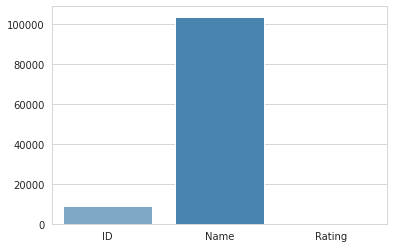

In [80]:

print(users_pd.nunique(axis=0))

sns.barplot(x = users_pd.columns, y = users_pd.nunique(axis=0), palette="Blues_d")

In [81]:
users_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362596 entries, 0 to 362595
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   ID      362596 non-null  object
 1   Name    362596 non-null  object
 2   Rating  362596 non-null  object
dtypes: object(3)
memory usage: 8.3+ MB


<AxesSubplot:>

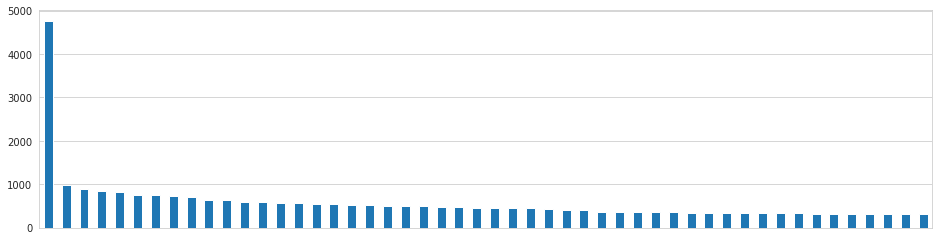

In [82]:
# univariate analysis

plt.figure(1, figsize = (16,4))

x_ax = plt.gca()

x_ax.get_xaxis().set_visible(False)

users_pd['Name'].value_counts()[:50].plot(kind = 'bar')

<AxesSubplot:>

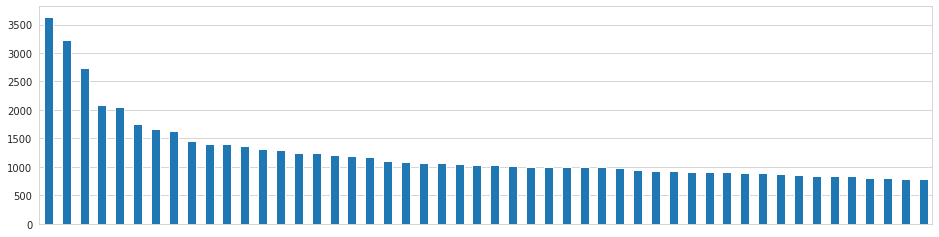

In [83]:
plt.figure(2, figsize = (16,4))

x_ax = plt.gca()

x_ax.get_xaxis().set_visible(False)

users_pd['ID'].value_counts()[:50].plot(kind = 'bar')

In [84]:
users_pd['Rating'].value_counts()

really liked it                      132808
liked it                              96047
it was amazing                        92354
it was ok                             28811
did not like it                        7811
This user doesn't have any rating      4765
Name: Rating, dtype: int64

In [85]:
# drop the user without any rating
no_rating_df = users_pd[users_pd['Rating']=='This user doesn\'t have any rating']
no_rating_df['Name'].value_counts()

Rating    4765
Name: Name, dtype: int64

In [86]:
users_pd_dropna = users_pd.drop(no_rating_df.index.tolist())
users_pd_dropna['Rating'].value_counts()

really liked it    132808
liked it            96047
it was amazing      92354
it was ok           28811
did not like it      7811
Name: Rating, dtype: int64

#### Map the string rating to integers

In [87]:
label_map = {'it was amazing':5, 'really liked it':4, 'liked it':3, 'it was ok':2, 'did not like it':1 }
users_pd_dropna["Rating_numeric"] = users_pd_dropna["Rating"].map(label_map)
users_pd_dropna.head()

,ID,Name,Rating,Rating_numeric
0,1,Agile Web Development with Rails: A Pragmatic ...,it was amazing,5
1,1,The Restaurant at the End of the Universe (Hit...,it was amazing,5
2,1,Siddhartha,it was amazing,5
3,1,The Clock of the Long Now: Time and Responsibi...,really liked it,4
4,1,"Ready Player One (Ready Player One, #1)",really liked it,4


In [88]:
users_pd_dropna["Rating_numeric"].value_counts()

4    132808
3     96047
5     92354
2     28811
1      7811
Name: Rating_numeric, dtype: int64

**Creating Training and Validation set for the recommender system**

for this purpose, we first take only those customers whose ratings are > 0 i.e. they have given some sort of rating
and then take a random sample out of them i.e. we hide few of the previously rated books as the test set. Let's see an 
example of how this is to be done.

MultiIndex([('Rating_numeric', 'count')],
           )


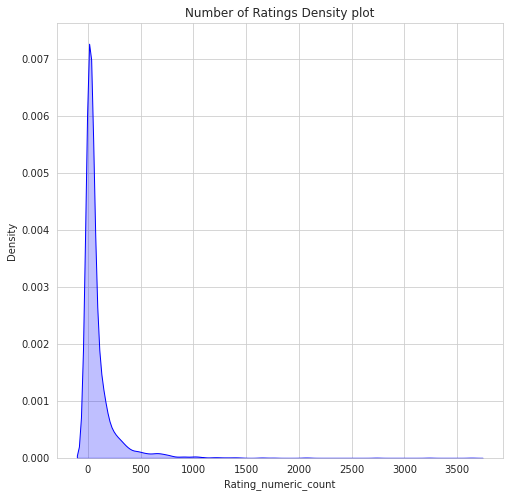

In [89]:
user_rating_pos = users_pd_dropna[users_pd_dropna['Rating_numeric']>0]
user_rating_zero = users_pd_dropna[users_pd_dropna['Rating_numeric']==0]
pos_rating_summary=user_rating_pos[['ID', 'Rating_numeric']].groupby(['ID']).agg(['count'])
print(pos_rating_summary.columns)
pos_rating_summary.columns = ['_'.join(col) for col in pos_rating_summary.columns.values]
pos_rating_summary.reset_index(inplace=True)
plt.figure(figsize = (8, 8))
plt.title('Number of Ratings Density plot')
sns.kdeplot(pos_rating_summary['Rating_numeric_count'], color="blue", shade=True)
plt.show()

In [90]:
kk = (len(pos_rating_summary[pos_rating_summary['Rating_numeric_count']>=10])/len(pos_rating_summary))*100
print("Percentage of people with 10 or more reviews: "+ str(kk))

Percentage of people with 10 or more reviews: 65.31054405392392


We will choose our test train split from these set of users who have atleast 10 or more reviews. This will ensure that if we take a 80-20 split, we have atleast 1 book that is held out for test predictions

In [91]:
eligible_customer_list = pos_rating_summary[pos_rating_summary['Rating_numeric_count']>=10].ID.tolist()
user_rating_eligible = user_rating_pos[user_rating_pos.ID.isin(eligible_customer_list)]
user_rating_NotEligible = user_rating_pos[~user_rating_pos.ID.isin(eligible_customer_list)]
user_rating_NotEligible.shape,user_rating_eligible.shape,user_rating_pos.shape

((5048, 4), (352783, 4), (357831, 4))

In [92]:
##Create test and train split
split_idx = np.random.rand(len(user_rating_eligible)) < 0.8
user_rating_train_temp = user_rating_eligible[split_idx]
user_rating_test = user_rating_eligible[~split_idx]
user_rating_train = pd.concat([user_rating_train_temp,user_rating_NotEligible], ignore_index=True)
user_rating_train.shape, user_rating_train_temp.shape,user_rating_NotEligible.shape

((287281, 4), (282233, 4), (5048, 4))

### 3.2 SVD Matrix Factorization based CF
**Data Pre-processing for Matrix Factorization**

For using SVD to do Matrix Factorization we need to convert it into wide format from Long format.

In [93]:
nb_users  = user_rating_train['ID'].nunique()
nb_books = user_rating_train['Name'].nunique()

print("There are %d unique users and %d unique books; so we need to prepare " 
      "an matrix of size %d by %d." %(nb_users, nb_books, nb_users, nb_books))

There are 4154 unique users and 89164 unique books; so we need to prepare an matrix of size 4154 by 89164.


In [94]:
# form the user rating table
user_rating_table = pd.pivot_table(user_rating_train, values='Rating_numeric',index='ID', columns='Name').fillna(0)
user_rating_table.head()

Name,""" Talking Heads ""","""A Problem from Hell"": America and the Age of Genocide","""A"" Is for Africa","""B"" Is for Betsy","""Beat"" Takeshi Kitano","""Cinema Paradiso""","""Do you consider yourself a postmodern author?"": Interviews with Contemporary English Writers","""Giant"" Size","""Headhunter"" Hiring Secrets: The Rules of the Hiring Game Have Changed . . . Forever!","""I Am a Man"": Chief Standing Bear's Journey for Justice",...,"달빛 조각사 4 (The Legendary Moonlight Sculptor, #4)","달빛 조각사 42 (The Legendary Moonlight Sculptor, #42)","달빛 조각사 43 (The Legendary Moonlight Sculptor, #43)","달빛 조각사 5 (The Legendary Moonlight Sculptor, #5)","달빛 조각사 6 (The Legendary Moonlight Sculptor, #6)","달빛 조각사 8 (The Legendary Moonlight Sculptor, #8)","달빛 조각사 9 (The Legendary Moonlight Sculptor, #9)",모리와 함께한 화요일,흰,�come Closer�: Critical Perspectives on Theatre of the Oppressed
ID,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [95]:
user_rating_matrix = user_rating_table.to_numpy()
user_ratings_mean = np.mean(user_rating_matrix, axis = 1)
print(user_ratings_mean.shape)
user_rating_matrix_dm = user_rating_matrix - user_ratings_mean.reshape(-1, 1) ##Normalizing the ratings here, one can try a version without
                                                                              ##this and see if the recommendations are any better/worse

(4154,)


In [96]:
from scipy.sparse.linalg import svds
U, sigma, V = svds(user_rating_matrix_dm, k = 50)
sigma = np.diag(sigma)

In [97]:
print(sigma.shape)

(50, 50)


In [98]:

all_user_predicted_ratings = np.dot(np.dot(U, sigma), V) + user_ratings_mean.reshape(-1, 1)
preds_df = pd.DataFrame(all_user_predicted_ratings, columns = user_rating_table.columns)


In [99]:
kk=pd.DataFrame(user_rating_table.index.values)
kk.rename(columns={ kk.columns[0]: "ID" }, inplace = True)
preds_df=pd.concat([kk,preds_df],axis=1)
preds_df.rename(columns={ preds_df.columns[0]: "ID" }, inplace = True)
preds_df

,ID,""" Talking Heads ""","""A Problem from Hell"": America and the Age of Genocide","""A"" Is for Africa","""B"" Is for Betsy","""Beat"" Takeshi Kitano","""Cinema Paradiso""","""Do you consider yourself a postmodern author?"": Interviews with Contemporary English Writers","""Giant"" Size","""Headhunter"" Hiring Secrets: The Rules of the Hiring Game Have Changed . . . Forever!",...,"달빛 조각사 4 (The Legendary Moonlight Sculptor, #4)","달빛 조각사 42 (The Legendary Moonlight Sculptor, #42)","달빛 조각사 43 (The Legendary Moonlight Sculptor, #43)","달빛 조각사 5 (The Legendary Moonlight Sculptor, #5)","달빛 조각사 6 (The Legendary Moonlight Sculptor, #6)","달빛 조각사 8 (The Legendary Moonlight Sculptor, #8)","달빛 조각사 9 (The Legendary Moonlight Sculptor, #9)",모리와 함께한 화요일,흰,�come Closer�: Critical Perspectives on Theatre of the Oppressed
0,1,0.046209,-0.129443,-0.186573,0.022301,0.053534,0.128235,0.046209,-0.107072,0.034785,...,-0.043863,-0.043863,-0.043863,-0.043863,-0.043863,-0.043863,-0.043863,0.058539,-0.031446,0.048030
1,2,0.001883,0.001620,0.001510,0.001846,0.001895,0.002008,0.001883,0.001651,0.001866,...,0.001750,0.001750,0.001750,0.001750,0.001750,0.001750,0.001750,0.001903,0.001761,0.001886
2,3,0.006631,-0.025552,-0.036078,0.002246,0.007975,0.021643,0.006631,-0.021425,0.004540,...,-0.009877,-0.009877,-0.009877,-0.009877,-0.009877,-0.009877,-0.009877,0.008875,-0.007614,0.006965
3,4,-0.011428,0.061083,0.084803,-0.001547,-0.014458,-0.045253,-0.011428,0.051785,-0.006718,...,0.025765,0.025765,0.025765,0.025765,0.025765,0.025765,0.025765,-0.016484,0.020668,-0.012180
4,5,0.102273,-0.353918,-0.536201,0.037730,0.122669,0.316399,0.102273,-0.298523,0.072538,...,-0.131053,-0.131053,-0.131053,-0.131053,-0.131053,-0.131053,-0.131053,0.136591,-0.109113,0.105795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4149,10986,0.040419,-0.161761,-0.386452,0.003714,0.050499,0.146214,0.040419,-0.149891,0.026772,...,-0.057817,-0.057817,-0.057817,-0.057817,-0.057817,-0.057817,-0.057817,0.057108,-0.093197,0.042283
4150,10988,0.016292,-0.064588,-0.154388,0.001616,0.020326,0.058608,0.016292,-0.059831,0.010834,...,-0.023003,-0.023003,-0.023003,-0.023003,-0.023003,-0.023003,-0.023003,0.022970,-0.037136,0.017038
4151,10993,-0.005813,0.024735,0.058661,-0.000269,-0.007337,-0.021797,-0.005813,0.022940,-0.003751,...,0.009029,0.009029,0.009029,0.009029,0.009029,0.009029,0.009029,-0.008335,0.014369,-0.006095
4152,10996,0.046567,-0.189418,-0.458041,0.003849,0.058403,0.170820,0.046567,-0.176881,0.030630,...,-0.067546,-0.067546,-0.067546,-0.067546,-0.067546,-0.067546,-0.067546,0.066496,-0.111186,0.048698


**Compare the predictions**

We will compare th overlap of recommendations at Top-k with the hold out set and see how the recommender system performed in general.

In [100]:
##Function for checking overlap for one specific user
def check_overlap(UserId,top_recos_to_check):
    samp_cust = user_rating_test[user_rating_test['ID']==UserId]
    samp_cust.sort_values(by='Rating_numeric', ascending=False, inplace=True)
    book_name_testcust = samp_cust.Name.unique().tolist()
    available_actual_ratings = samp_cust.shape[0]
    rows_to_fetch = min(available_actual_ratings,top_recos_to_check)
    preds_df_sampcust = preds_df[preds_df['ID']==UserId]
    if preds_df_sampcust.shape[0] ==0:
        pass
    elif preds_df_sampcust.shape[0] >0:
        preds_check_cust = preds_df_sampcust.T
        preds_check_cust.reset_index(inplace=True)
        preds_check_cust.rename(columns={ preds_check_cust.columns[0]: "Name" }, inplace = True)
        #preds_check_cust = preds_df_sampcust_T[preds_df_sampcust_T['Name']!='ID']
        preds_check_cust.rename(columns={ preds_check_cust.columns[1]: "Ratings_normalized_predicted" }, inplace = True)
        preds_check_cust.sort_values(by='Ratings_normalized_predicted', ascending=0, inplace=True)
        preds_check_cust_check = preds_check_cust[preds_check_cust.Name.isin(book_name_testcust)]
        actual_rating = samp_cust.iloc[0:rows_to_fetch,:]
        pred_rating = preds_check_cust_check.iloc[0:rows_to_fetch,:]
        overlap = pd.Series(list(set(actual_rating.Name).intersection(set(pred_rating.Name))))
        pct_overlap = (len(overlap)/rows_to_fetch)*100
        #print("Percentage of overlap in top"+str(top_recos_to_check)+" for User ID - "+str(UserId)+" : "+str(pct_overlap))
        return pct_overlap

In [101]:
test_user_list = user_rating_test.ID.unique().tolist()
overlap_summary={}
top_recos_to_check =10
for users in test_user_list:
    if check_overlap(users,top_recos_to_check) is not None:
        overlap_summary[users]= check_overlap(users,top_recos_to_check)

/home/jin/miniconda3/envs/mle_capstone/lib/python3.8/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/tmp/ipykernel_9716/3554030241.py:21: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  overlap = pd.Series(list(set(actual_rating.Name).intersection(set(pred_rating.Name))))


In [102]:
sorted_summary = sorted(overlap_summary.items(), key=lambda x: x[1], reverse=True)
max_overlap = np.array(list(overlap_summary.values())).max()
min_overlap = np.array(list(overlap_summary.values())).min()
mean_overlap = np.array(list(overlap_summary.values())).mean()
print("Max overlap in top" +str(top_recos_to_check)+ " books "+str(max_overlap))
print("Min overlap in top "+str(top_recos_to_check)+ " books "+str(min_overlap))
print("Average overlap in top "+str(top_recos_to_check)+ " books "+str(mean_overlap))

Max overlap in top10 books 100.0
Min overlap in top 10 books 0.0
Average overlap in top 10 books 62.1578266723356


### 3.3 Deep learning based CF

In [103]:
##Deep Learning specific stuff
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Concatenate
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import model_to_dot
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.layers import Dropout, Flatten,Activation,Input,Embedding
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.layers import dot
from tensorflow.keras.models import Model

2022-05-09 02:50:29.638021: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


In [104]:
user_rating_non = users_pd[users_pd['Name']=='Rating']
user_rating_non.head()

,ID,Name,Rating
1566,10,Rating,This user doesn't have any rating
1604,13,Rating,This user doesn't have any rating
2269,22,Rating,This user doesn't have any rating
2270,23,Rating,This user doesn't have any rating
2434,27,Rating,This user doesn't have any rating


In [105]:
book_map = users_pd[['Name']]
book_map.drop_duplicates(subset=['Name'],keep='first',inplace=True)
book_map.reset_index(drop=True, inplace=True)
book_map['Book_Id']=book_map.index.values
user_rating_temp = pd.merge(users_pd,book_map, on='Name', how='left')
user_rating = user_rating_temp[user_rating_temp['Name']!='Rating'] ##Dropping users who have not rated any books
user_rating.head()

/home/jin/miniconda3/envs/mle_capstone/lib/python3.8/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/tmp/ipykernel_9716/463382217.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  book_map['Book_Id']=book_map.index.values


,ID,Name,Rating,Book_Id
0,1,Agile Web Development with Rails: A Pragmatic ...,it was amazing,0
1,1,The Restaurant at the End of the Universe (Hit...,it was amazing,1
2,1,Siddhartha,it was amazing,2
3,1,The Clock of the Long Now: Time and Responsibi...,really liked it,3
4,1,"Ready Player One (Ready Player One, #1)",really liked it,4


In [106]:
book_map.index.value_counts()

0         1
69019     1
69029     1
69028     1
69027     1
         ..
34508     1
34507     1
34506     1
34505     1
103532    1
Length: 103533, dtype: int64

In [107]:
le = preprocessing.LabelEncoder()
user_rating['Rating_numeric'] = le.fit_transform(user_rating.Rating.values)
users = user_rating.ID.unique()
books = user_rating.Book_Id.unique()
##Train-test split  - keeping 80%-20% for simplicity. But one can create a k-fold set up for better accuracy as well
userid2idx = {o:i for i,o in enumerate(users)}
bookid2idx = {o:i for i,o in enumerate(books)}
user_rating['ID'] = user_rating['ID'].apply(lambda x: userid2idx[x])
user_rating['Book_Id'] = user_rating['Book_Id'].apply(lambda x: bookid2idx[x])
y=user_rating['Rating_numeric'];
X=user_rating.drop(['Rating_numeric'],axis=1)
####
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape , X_test.shape)

/tmp/ipykernel_9716/3269964075.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_rating['Rating_numeric'] = le.fit_transform(user_rating.Rating.values)
/tmp/ipykernel_9716/3269964075.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_rating['ID'] = user_rating['ID'].apply(lambda x: userid2idx[x])
/tmp/ipykernel_9716/3269964075.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

(286264, 4) (71567, 4)


In [108]:
def build_model(dropout,latent_factors):
    n_books=len(user_rating['Book_Id'].unique())
    n_users=len(user_rating['ID'].unique())
    n_latent_factors=latent_factors  # hyperparamter to deal with. 
    user_input=Input(shape=(1,),name='user_input',dtype='int64')
    user_embedding=Embedding(n_users,n_latent_factors,name='user_embedding',embeddings_initializer=tf.keras.initializers.GlorotUniform(seed=42))(user_input)
    user_vec =Flatten(name='FlattenUsers')(user_embedding)
    #user_vec=Dropout(dropout)(user_vec)
    book_input=Input(shape=(1,),name='book_input',dtype='int64')
    book_embedding=Embedding(n_books,n_latent_factors,name='book_embedding',embeddings_initializer=tf.keras.initializers.GlorotUniform(seed=42))(book_input)
    book_vec=Flatten(name='FlattenBooks')(book_embedding)
    #book_vec=Dropout(dropout)(book_vec)
    sim = tf.concat([user_vec, book_vec], axis=1)
    #sim=dot([user_vec,book_vec],name='Similarity-Dot-Product',axes=1)
    nn_inp=Dense(256,activation='relu')(sim)
    nn_inp=BatchNormalization()(nn_inp)
    nn_inp=Dropout(dropout)(nn_inp)
    nn_inp=Dense(64,activation='relu')(nn_inp)
    nn_inp=BatchNormalization()(nn_inp)
    nn_inp=Dropout(dropout)(nn_inp)
    nn_inp=Dense(1,activation='relu')(nn_inp)
    nn_model =Model([user_input, book_input],nn_inp)
    return nn_model
    

In [109]:
nn_model = build_model(0.2,16)
nn_model.summary()

2022-05-09 02:50:32.023837: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2022-05-09 02:50:32.109582: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-09 02:50:32.110009: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: GeForce GTX 1080 Ti computeCapability: 6.1
coreClock: 1.582GHz coreCount: 28 deviceMemorySize: 10.91GiB deviceMemoryBandwidth: 451.17GiB/s
2022-05-09 02:50:32.110068: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-09 02:50:32.110853: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 1 with properties: 
pciBusID: 0000:

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
user_input (InputLayer)         [(None, 1)]          0                                            
__________________________________________________________________________________________________
book_input (InputLayer)         [(None, 1)]          0                                            
__________________________________________________________________________________________________
user_embedding (Embedding)      (None, 1, 16)        66464       user_input[0][0]                 
__________________________________________________________________________________________________
book_embedding (Embedding)      (None, 1, 16)        1656512     book_input[0][0]                 
______________________________________________________________________________________________

In [110]:
loss_fun = tf.keras.losses.MeanSquaredError()
nn_model.compile(optimizer=Adam(lr=5e-5),loss=loss_fun)
batch_size=128
epochs=8
History = nn_model.fit([X_train.ID,X_train.Book_Id],y_train, batch_size=batch_size,
                              epochs =epochs, validation_data = ([X_test.ID,X_test.Book_Id],y_test),
                              verbose = 1)

Epoch 1/8


/home/jin/miniconda3/envs/mle_capstone/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(
2022-05-09 02:50:39.113993: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-05-09 02:50:39.132170: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 3999980000 Hz
2022-05-09 02:50:39.779232: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11


   9/2237 [..............................] - ETA: 31s - loss: 6.7108  

2022-05-09 02:50:40.778323: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.11


2237/2237 [==============================] - 32s 14ms/step - loss: 4.0730 - val_loss: 3.0107
Epoch 2/8
2237/2237 [==============================] - 26s 12ms/step - loss: 3.0025 - val_loss: 2.7001
Epoch 3/8
2237/2237 [==============================] - 26s 11ms/step - loss: 2.5495 - val_loss: 2.3229
Epoch 4/8
2237/2237 [==============================] - 27s 12ms/step - loss: 2.1279 - val_loss: 2.0969
Epoch 5/8
2237/2237 [==============================] - 33s 15ms/step - loss: 1.8103 - val_loss: 1.9531
Epoch 6/8
2237/2237 [==============================] - 26s 12ms/step - loss: 1.5015 - val_loss: 1.8095
Epoch 7/8
2237/2237 [==============================] - 23s 10ms/step - loss: 1.3312 - val_loss: 1.7330
Epoch 8/8
2237/2237 [==============================] - 28s 13ms/step - loss: 1.1760 - val_loss: 1.7363


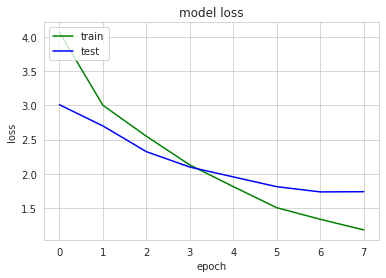

In [111]:
plt.plot(History.history['loss'] , 'g')
plt.plot(History.history['val_loss'] , 'b')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()

In [112]:
preds = nn_model.predict([X_test.ID,X_test.Book_Id])
avp = (preds,y_test)
df_id = pd.DataFrame(np.array(X_test.ID))
df_Book_id = pd.DataFrame(np.array(X_test.Book_Id))
df_actual_rating = pd.DataFrame(np.array(y_test))
df_preds = pd.DataFrame(preds)
dfList = [df_id, df_Book_id,df_actual_rating,df_preds]  # List of your dataframes
avp = pd.concat(dfList,ignore_index=True,axis=1)
#new_df = pd.concat([new_df,df_preds],ignore_index=True,axis=1)
avp.rename(columns={ avp.columns[0]: "ID" }, inplace = True)
avp.rename(columns={ avp.columns[1]: "Book_Id" }, inplace = True)
avp.rename(columns={ avp.columns[2]: "Rating_numeric" }, inplace = True)
avp.rename(columns={ avp.columns[3]: "Pred_Rating" }, inplace = True)
avp

,ID,Book_Id,Rating_numeric,Pred_Rating
0,587,7786,4,1.951837
1,2230,32314,4,3.069938
2,3377,3522,1,2.458968
3,390,270,4,2.218259
4,10,1470,4,2.447562
...,...,...,...,...
71562,577,5077,3,3.161253
71563,2331,4684,0,2.783287
71564,93,4750,3,2.987174
71565,81,4156,3,2.611382


In [113]:
def check_overlap(UserId,top_recos_to_check):
    samp_cust = avp[avp['ID']==UserId][['ID','Rating_numeric','Book_Id']]
    samp_cust.sort_values(by='Rating_numeric', ascending=False, inplace=True)
    available_actual_ratings = samp_cust.shape[0]
    rows_to_fetch = min(available_actual_ratings,top_recos_to_check)
    preds_df_sampcust = avp[avp['ID']==UserId][['ID','Pred_Rating','Book_Id']]
    preds_df_sampcust.sort_values(by='Pred_Rating', ascending=False, inplace=True)
    actual_rating = samp_cust.iloc[0:rows_to_fetch,:]
    pred_rating = preds_df_sampcust.iloc[0:rows_to_fetch,:]
    overlap = pd.Series(list(set(actual_rating.Book_Id).intersection(set(pred_rating.Book_Id))))
    pct_overlap = (len(overlap)/rows_to_fetch)*100
    #print("Percentage of overlap in top"+str(top_recos_to_check)+" for User ID - "+str(UserId)+" : "+str(pct_overlap))
    return pct_overlap

In [114]:
test_user_list = avp.ID.unique().tolist()
overlap_summary={}
top_recos_to_check =10
for users in test_user_list:
    overlap_summary[users]= check_overlap(users,top_recos_to_check)

/tmp/ipykernel_9716/3432704591.py:10: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  overlap = pd.Series(list(set(actual_rating.Book_Id).intersection(set(pred_rating.Book_Id))))


In [115]:
sorted_summary = sorted(overlap_summary.items(), key=lambda x: x[1], reverse=True)
max_overlap = np.array(list(overlap_summary.values())).max()
min_overlap = np.array(list(overlap_summary.values())).min()
mean_overlap = np.array(list(overlap_summary.values())).mean()
print("Max overlap in top" +str(top_recos_to_check)+ " books "+str(max_overlap))
print("Min overlap in top "+str(top_recos_to_check)+ " books "+str(min_overlap))
print("Average overlap in top "+str(top_recos_to_check)+ " books "+str(mean_overlap))

Max overlap in top10 books 100.0
Min overlap in top 10 books 0.0
Average overlap in top 10 books 75.48844537815125


## 4. Hybrid Book Recommender

It is desirable to combine content-based book recommender and collaborative filter based book recommender. The idea is that we can embed the content-based TF-IDF feature into an embedding vector. In the meantime, we already have the embedding vector from the user rating dataset. Next, if an item is in both the user rating dataset and the book dataset, we average the cosine similarity from the two datasets

In [116]:
books_eng["Name"].value_counts()

Aesop's Fables                  5
Selected Writings               5
The Collected Stories           5
The Perfect Wife                4
Moonrise                        4
                               ..
Hustler: The Clinton Legacy     1
The Antitrust Laws: A Primer    1
Sadie Shapiro, Matchmaker       1
Polar Animals                   1
Piranesi's Dream                1
Name: Name, Length: 109931, dtype: int64

In [117]:
books_eng[books_eng["Name"] == "Aesop's Fables"]

,Id,Name,Authors,ISBN,Rating,PublishYear,PublishMonth,PublishDay,Publisher,RatingDist5,RatingDist4,RatingDist3,RatingDist2,RatingDist1,RatingDistTotal,Language,Description
45747,682759,Aesop's Fables,Russell Ash,0877017808,4.19,1990,1,9,Chronicle Books,86,72,32,5,2,197,eng,The Hare and the Tortoise. The Lion and the Mo...
339152,1363830,Aesop's Fables,Brad Sneed,0803727518,4.08,2003,9,29,Dial Books for Young Readers,40,49,24,2,1,116,eng,"Touched with passion, humor, life, here are A..."
394352,882986,Aesop's Fables,Aesop,1853261289,4.05,1999,5,3,Wordsworth Classics,42367,39564,25246,4143,895,112215,eng,An alternate cover for this edition can be fou...
494212,1064006,Aesop's Fables,Anna Milbourne,079451135X,4.10,2006,1,1,Usborne Books,21,19,8,1,2,51,eng,"- Traditional folk stories, myths, and fables ..."
1313164,1180535,Aesop's Fables,Jerry Pinkney,1587170000,4.25,2000,1,9,SeaStar Books,419,329,131,23,4,906,eng,"In this elegantly designed volume, more than s..."


In [118]:
book_user = users_pd.merge(books_eng, on='Name',how='inner')
book_user.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 133593 entries, 0 to 133592
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ID               133593 non-null  object 
 1   Name             133593 non-null  object 
 2   Rating_x         133593 non-null  object 
 3   Id               133593 non-null  object 
 4   Authors          133593 non-null  object 
 5   ISBN             133593 non-null  object 
 6   Rating_y         133593 non-null  float64
 7   PublishYear      133593 non-null  int64  
 8   PublishMonth     133593 non-null  int64  
 9   PublishDay       133593 non-null  int64  
 10  Publisher        133593 non-null  object 
 11  RatingDist5      133593 non-null  int64  
 12  RatingDist4      133593 non-null  int64  
 13  RatingDist3      133593 non-null  int64  
 14  RatingDist2      133593 non-null  int64  
 15  RatingDist1      133593 non-null  int64  
 16  RatingDistTotal  133593 non-null  int6

In [119]:
book_user['Name'].value_counts()

The Great Gatsby                                                  2655
Pride and Prejudice                                               1160
The Catcher in the Rye                                             985
The Da Vinci Code (Robert Langdon, #2)                             846
To Kill a Mockingbird                                              830
                                                                  ... 
Bios                                                                 1
Dogs of God                                                          1
This Is the Way the World Ends                                       1
The Eternal Footman (Godhead, #3)                                    1
The Horizontal World: Growing Up Wild in the Middle of Nowhere       1
Name: Name, Length: 13614, dtype: int64

In [120]:
#Encode each book with Book_Id
book_map = book_user[['Name']]
book_map.drop_duplicates(subset=['Name'],keep='first',inplace=True)
book_map.reset_index(drop=True,inplace=True)
book_map.info()
book_map['Book_Id']=book_map.index.values
print(book_map.index.values)
book_user_wid = pd.merge(book_user,book_map, on=['Name'], how='left')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13614 entries, 0 to 13613
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    13614 non-null  object
dtypes: object(1)
memory usage: 106.5+ KB
[    0     1     2 ... 13611 13612 13613]


/home/jin/miniconda3/envs/mle_capstone/lib/python3.8/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/tmp/ipykernel_9716/779982206.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  book_map['Book_Id']=book_map.index.values


In [121]:
book_user_wid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 133593 entries, 0 to 133592
Data columns (total 20 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ID               133593 non-null  object 
 1   Name             133593 non-null  object 
 2   Rating_x         133593 non-null  object 
 3   Id               133593 non-null  object 
 4   Authors          133593 non-null  object 
 5   ISBN             133593 non-null  object 
 6   Rating_y         133593 non-null  float64
 7   PublishYear      133593 non-null  int64  
 8   PublishMonth     133593 non-null  int64  
 9   PublishDay       133593 non-null  int64  
 10  Publisher        133593 non-null  object 
 11  RatingDist5      133593 non-null  int64  
 12  RatingDist4      133593 non-null  int64  
 13  RatingDist3      133593 non-null  int64  
 14  RatingDist2      133593 non-null  int64  
 15  RatingDist1      133593 non-null  int64  
 16  RatingDistTotal  133593 non-null  int6

In [122]:
# Select columns
book_user_wid.rename(columns={'ID':'User_ID'}, inplace=True)
book_user_sel = book_user_wid.iloc[:,[0,1,2,4,18,19]]
book_user_sel

,User_ID,Name,Rating_x,Authors,Description,Book_Id
0,1,The Restaurant at the End of the Universe (Hit...,it was amazing,Douglas Adams,Just when you thought it was safe to go back t...,0
1,73,The Restaurant at the End of the Universe (Hit...,really liked it,Douglas Adams,Just when you thought it was safe to go back t...,0
2,116,The Restaurant at the End of the Universe (Hit...,it was amazing,Douglas Adams,Just when you thought it was safe to go back t...,0
3,171,The Restaurant at the End of the Universe (Hit...,really liked it,Douglas Adams,Just when you thought it was safe to go back t...,0
4,338,The Restaurant at the End of the Universe (Hit...,liked it,Douglas Adams,Just when you thought it was safe to go back t...,0
...,...,...,...,...,...,...
133588,3166,The Bible Salesman,really liked it,Clyde Edgerton,When career criminal Preston Clearwater picks ...,13609
133589,3166,My Side Of The Story,liked it,Will Davis,"My name is Jarold, but everyone calls me Jaz, ...",13610
133590,3166,Life as We Know It: A Collection of Personal E...,liked it,Jennifer Foote Sweeney,"""...these essays are jewels of the unexpected,...",13611
133591,3166,"Hello, I Must Be Going",really liked it,Christie Hodgen,"It's the early 1980s, and tomboy Frankie Hawth...",13612


In [123]:
#Extract book information
book_df = book_user_sel[['Name','Authors','Description', 'Book_Id']].drop_duplicates(subset=['Name'],keep='first')
book_df

,Name,Authors,Description,Book_Id
0,The Restaurant at the End of the Universe (Hit...,Douglas Adams,Just when you thought it was safe to go back t...,0
48,Siddhartha,Hermann Hesse,"In the novel, Siddhartha, a young man, leaves ...",1
311,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,2
771,The Authoritative Calvin and Hobbes: A Calvin ...,Bill Watterson,"The Authoritative Calvin and Hobbes, is a larg...",3
783,A Short History of Nearly Everything,Bill Bryson,One of the world’s most beloved and bestsellin...,4
...,...,...,...,...
133588,The Bible Salesman,Clyde Edgerton,When career criminal Preston Clearwater picks ...,13609
133589,My Side Of The Story,Will Davis,"My name is Jarold, but everyone calls me Jaz, ...",13610
133590,Life as We Know It: A Collection of Personal E...,Jennifer Foote Sweeney,"""...these essays are jewels of the unexpected,...",13611
133591,"Hello, I Must Be Going",Christie Hodgen,"It's the early 1980s, and tomboy Frankie Hawth...",13612


In [124]:
#TF-IDF encoding
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import TfidfVectorizer

In [125]:
tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 1), min_df=0.001, stop_words='english')
books_tdidf = tf.fit_transform(book_df['Description'])

In [126]:
print(type(books_tdidf))
books_tdidf_df = pd.DataFrame.sparse.from_spmatrix(books_tdidf)
books_tdidf_df.info()

<class 'scipy.sparse.csr.csr_matrix'>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13614 entries, 0 to 13613
Columns: 9215 entries, 0 to 9214
dtypes: Sparse[float64, 0](9215)
memory usage: 8.2 MB


In [127]:
#split books_tdidf_df into train and test for autoencoder
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [128]:
x_train, x_test,y_train, y_test = train_test_split(books_tdidf_df, books_tdidf_df, test_size=0.1, random_state=2022)

In [129]:
#Use autoencoder to supress the TF-IDF vector
##Deep Learning specific stuff
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Concatenate
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import model_to_dot
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.layers import Dropout, Flatten,Activation,Input,Embedding
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.layers import dot
from tensorflow.keras.models import Model

In [130]:
#build autoencoder model
def build_autoencoder(input_dim, middle_dim, latent_factors, drop_out): 
    book_input=Input(shape=(input_dim,),name='book_input',dtype=tf.float64)
    #encoder
    dense1out = Dense(middle_dim, activation='relu')(book_input)
    bat1out = BatchNormalization()(dense1out)
    drop1out = Dropout(drop_out)(bat1out)
    encout = Dense(latent_factors, activation='relu',name='embedding')(drop1out)
    #decoder
    dense3out = Dense(middle_dim, activation='relu')(encout)
    bat2out = BatchNormalization()(dense3out)
    drop2out = Dropout(drop_out)(bat2out)
    dense4out = Dense(input_dim)(drop2out)
    bat3out = BatchNormalization()(dense4out)
    decout = tf.keras.activations.sigmoid(bat3out)


    autoencoder =Model(book_input,decout)
    return autoencoder

In [131]:
autoenc = build_autoencoder(x_train.shape[1], 2000, 32, 0.2)
autoenc.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
book_input (InputLayer)      [(None, 9215)]            0         
_________________________________________________________________
dense_3 (Dense)              (None, 2000)              18432000  
_________________________________________________________________
batch_normalization_2 (Batch (None, 2000)              8000      
_________________________________________________________________
dropout_2 (Dropout)          (None, 2000)              0         
_________________________________________________________________
embedding (Dense)            (None, 32)                64032     
_________________________________________________________________
dense_4 (Dense)              (None, 2000)              66000     
_________________________________________________________________
batch_normalization_3 (Batch (None, 2000)              8000

In [132]:
loss_fun = tf.keras.losses.MeanSquaredError()
autoenc.compile(optimizer=Adam(lr=1e-3),loss=loss_fun)
batch_size=32
epochs=12
History = autoenc.fit(x_train,x_train, batch_size=batch_size,
                              epochs =epochs, validation_data = (x_test, x_test),
                              verbose = 1)

/home/jin/miniconda3/envs/mle_capstone/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/12
383/383 [==============================] - 4s 10ms/step - loss: 0.2044 - val_loss: 0.1441
Epoch 2/12
383/383 [==============================] - 3s 9ms/step - loss: 0.1390 - val_loss: 0.0846
Epoch 3/12
383/383 [==============================] - 3s 8ms/step - loss: 0.1017 - val_loss: 0.0522
Epoch 4/12
383/383 [==============================] - 3s 8ms/step - loss: 0.0816 - val_loss: 0.0482
Epoch 5/12
383/383 [==============================] - 3s 8ms/step - loss: 0.0702 - val_loss: 0.0347
Epoch 6/12
383/383 [==============================] - 3s 8ms/step - loss: 0.0610 - val_loss: 0.0211
Epoch 7/12
383/383 [==============================] - 3s 8ms/step - loss: 0.0534 - val_loss: 0.0175
Epoch 8/12
383/383 [==============================] - 3s 8ms/step - loss: 0.0468 - val_loss: 0.0133
Epoch 9/12
383/383 [==============================] - 3s 8ms/step - loss: 0.0338 - val_loss: 0.0102
Epoch 10/12
383/383 [==============================] - 3s 7ms/step - loss: 0.0193 - val_loss: 0.011

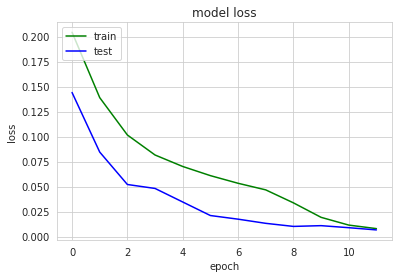

In [133]:
plt.plot(History.history['loss'] , 'g')
plt.plot(History.history['val_loss'] , 'b')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()

In [134]:
#extract the embedding
extractor = Model(inputs=autoenc.inputs,outputs=autoenc.get_layer('embedding').output)
book_embedding = extractor.predict(books_tdidf_df.to_numpy(), batch_size=1)

In [135]:
type(book_embedding)

numpy.ndarray

In [136]:
book_embedding[3,:]

array([14.064118 , 11.403662 ,  0.       ,  0.       , 16.475264 ,
        0.       ,  0.       , 35.16094  ,  0.       ,  0.       ,
        1.2655352,  7.7884955,  0.       ,  9.038274 , 22.568666 ,
        0.       , 12.363409 ,  2.966448 ,  0.       ,  0.       ,
        0.       ,  4.333201 , 16.607965 ,  0.       ,  0.       ,
       12.41167  , 19.028652 ,  6.154464 ,  0.       ,  0.       ,
        0.       ,  0.       ], dtype=float32)

In [137]:

torch.cuda.set_device(1)

In [138]:
#Use sentence transformer for embedding instead of TF-IDF
from sentence_transformers import SentenceTransformer

In [139]:
# Download model
model = SentenceTransformer('all-distilroberta-v1')

In [140]:

book_transformer_embedding = model.encode(book_df['Description'].values.tolist(), show_progress_bar=True)

Batches:   0%|          | 0/426 [00:00<?, ?it/s]

In [141]:
type(book_transformer_embedding)

numpy.ndarray

In [142]:
x_train, x_test,y_train, y_test = train_test_split(book_transformer_embedding, book_transformer_embedding, test_size=0.1, random_state=2022)

In [143]:
autoenc2 = build_autoencoder(x_train.shape[1], 300, 16, 0.2)
autoenc2.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
book_input (InputLayer)      [(None, 768)]             0         
_________________________________________________________________
dense_6 (Dense)              (None, 300)               230700    
_________________________________________________________________
batch_normalization_5 (Batch (None, 300)               1200      
_________________________________________________________________
dropout_4 (Dropout)          (None, 300)               0         
_________________________________________________________________
embedding (Dense)            (None, 16)                4816      
_________________________________________________________________
dense_7 (Dense)              (None, 300)               5100      
_________________________________________________________________
batch_normalization_6 (Batch (None, 300)               1200

In [144]:
loss_fun = tf.keras.losses.MeanSquaredError()
autoenc2.compile(optimizer=Adam(learning_rate=1e-4),loss=loss_fun)
batch_size=4
epochs=15
History = autoenc2.fit(x_train,y_train, batch_size=batch_size,
                              epochs =epochs, validation_data = (x_test, y_test),
                              verbose = 1)

Epoch 1/15
3063/3063 [==============================] - 9s 3ms/step - loss: 0.2548 - val_loss: 0.2138
Epoch 2/15
3063/3063 [==============================] - 7s 2ms/step - loss: 0.1696 - val_loss: 0.1292
Epoch 3/15
3063/3063 [==============================] - 7s 2ms/step - loss: 0.1068 - val_loss: 0.0876
Epoch 4/15
3063/3063 [==============================] - 6s 2ms/step - loss: 0.0728 - val_loss: 0.0596
Epoch 5/15
3063/3063 [==============================] - 5s 2ms/step - loss: 0.0488 - val_loss: 0.0397
Epoch 6/15
3063/3063 [==============================] - 5s 2ms/step - loss: 0.0323 - val_loss: 0.0261
Epoch 7/15
3063/3063 [==============================] - 6s 2ms/step - loss: 0.0212 - val_loss: 0.0173
Epoch 8/15
3063/3063 [==============================] - 7s 2ms/step - loss: 0.0140 - val_loss: 0.0114
Epoch 9/15
3063/3063 [==============================] - 7s 2ms/step - loss: 0.0093 - val_loss: 0.0077
Epoch 10/15
3063/3063 [==============================] - 7s 2ms/step - loss: 0.006

In [145]:
#Extract the embedding
extractor2 = Model(inputs=autoenc2.inputs,outputs=autoenc2.get_layer('embedding').output)
book_embedding_dim16 = extractor2.predict(book_transformer_embedding, batch_size=4)

In [146]:
book_embedding_dim16.shape

(13614, 16)

In [147]:
book_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13614 entries, 0 to 133592
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         13614 non-null  object
 1   Authors      13614 non-null  object
 2   Description  13614 non-null  object
 3   Book_Id      13614 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 531.8+ KB


In [148]:
#Create the content based book embedding data frame
book_embedding_dim16_df = pd.DataFrame(book_embedding_dim16)
book_df.reset_index(drop=True,inplace=True)
book_embedding_cb = pd.concat([book_df, book_embedding_dim16_df], axis=1)
book_df.head()

,Name,Authors,Description,Book_Id
0,The Restaurant at the End of the Universe (Hit...,Douglas Adams,Just when you thought it was safe to go back t...,0
1,Siddhartha,Hermann Hesse,"In the novel, Siddhartha, a young man, leaves ...",1
2,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,2
3,The Authoritative Calvin and Hobbes: A Calvin ...,Bill Watterson,"The Authoritative Calvin and Hobbes, is a larg...",3
4,A Short History of Nearly Everything,Bill Bryson,One of the world’s most beloved and bestsellin...,4


In [149]:
book_embedding_cb.head()

,Name,Authors,Description,Book_Id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,The Restaurant at the End of the Universe (Hit...,Douglas Adams,Just when you thought it was safe to go back t...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Siddhartha,Hermann Hesse,"In the novel, Siddhartha, a young man, leaves ...",1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,The Authoritative Calvin and Hobbes: A Calvin ...,Bill Watterson,"The Authoritative Calvin and Hobbes, is a larg...",3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,A Short History of Nearly Everything,Bill Bryson,One of the world’s most beloved and bestsellin...,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Bring the book embedding from user rating matrix based on deep learning collaborative filter

In [150]:
book_map = users_pd[['Name']]
book_map.drop_duplicates(subset=['Name'],keep='first',inplace=True)
book_map.reset_index(drop=True, inplace=True)
book_map['Book_Id']=book_map.index.values
user_rating_temp = pd.merge(users_pd,book_map, on='Name', how='left')
user_rating = user_rating_temp[user_rating_temp['Name']!='Rating'] ##Dropping users who have not rated any books
user_rating.head()

/home/jin/miniconda3/envs/mle_capstone/lib/python3.8/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/tmp/ipykernel_9716/463382217.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  book_map['Book_Id']=book_map.index.values


,ID,Name,Rating,Book_Id
0,1,Agile Web Development with Rails: A Pragmatic ...,it was amazing,0
1,1,The Restaurant at the End of the Universe (Hit...,it was amazing,1
2,1,Siddhartha,it was amazing,2
3,1,The Clock of the Long Now: Time and Responsibi...,really liked it,3
4,1,"Ready Player One (Ready Player One, #1)",really liked it,4


In [151]:
le = preprocessing.LabelEncoder()
user_rating['Rating_numeric'] = le.fit_transform(user_rating.Rating.values)
user_rating.head()

/tmp/ipykernel_9716/3987301278.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_rating['Rating_numeric'] = le.fit_transform(user_rating.Rating.values)


,ID,Name,Rating,Book_Id,Rating_numeric
0,1,Agile Web Development with Rails: A Pragmatic ...,it was amazing,0,1
1,1,The Restaurant at the End of the Universe (Hit...,it was amazing,1,1
2,1,Siddhartha,it was amazing,2,1
3,1,The Clock of the Long Now: Time and Responsibi...,really liked it,3,4
4,1,"Ready Player One (Ready Player One, #1)",really liked it,4,4


In [152]:
users = user_rating.ID.unique()
print(users)
books = user_rating.Book_Id.unique()
print(books)
userid2idx = {o:i for i,o in enumerate(users)}
bookid2idx = {o:i for i,o in enumerate(books)}
user_rating['ID'] = user_rating['ID'].apply(lambda x: userid2idx[x])
user_rating['Book_Id'] = user_rating['Book_Id'].apply(lambda x: bookid2idx[x])
user_rating.head()

/tmp/ipykernel_9716/1702201814.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_rating['ID'] = user_rating['ID'].apply(lambda x: userid2idx[x])


[1 2 3 ... 2986 3018 3155]
[     0      1      2 ... 103530 103531 103532]


/tmp/ipykernel_9716/1702201814.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_rating['Book_Id'] = user_rating['Book_Id'].apply(lambda x: bookid2idx[x])


,ID,Name,Rating,Book_Id,Rating_numeric
0,0,Agile Web Development with Rails: A Pragmatic ...,it was amazing,0,1
1,0,The Restaurant at the End of the Universe (Hit...,it was amazing,1,1
2,0,Siddhartha,it was amazing,2,1
3,0,The Clock of the Long Now: Time and Responsibi...,really liked it,3,4
4,0,"Ready Player One (Ready Player One, #1)",really liked it,4,4


In [153]:
y=user_rating['Rating_numeric'];
X=user_rating.drop(['Rating_numeric'],axis=1)

In [154]:
nn_model_embed = build_model(0.2,16)
nn_model_embed.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
user_input (InputLayer)         [(None, 1)]          0                                            
__________________________________________________________________________________________________
book_input (InputLayer)         [(None, 1)]          0                                            
__________________________________________________________________________________________________
user_embedding (Embedding)      (None, 1, 16)        66464       user_input[0][0]                 
__________________________________________________________________________________________________
book_embedding (Embedding)      (None, 1, 16)        1656512     book_input[0][0]                 
____________________________________________________________________________________________

In [155]:
loss_fun = tf.keras.losses.MeanSquaredError()
nn_model.compile(optimizer=Adam(lr=5e-5),loss=loss_fun)
batch_size=128
epochs=8
History = nn_model.fit([X.ID,X.Book_Id],y, batch_size=batch_size,
                              epochs =epochs,
                              verbose = 1)

/home/jin/miniconda3/envs/mle_capstone/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/8
2796/2796 [==============================] - 29s 10ms/step - loss: 1.2562
Epoch 2/8
2796/2796 [==============================] - 28s 10ms/step - loss: 1.1606
Epoch 3/8
2796/2796 [==============================] - 28s 10ms/step - loss: 1.0785
Epoch 4/8
2796/2796 [==============================] - 28s 10ms/step - loss: 1.0050
Epoch 5/8
2796/2796 [==============================] - 28s 10ms/step - loss: 0.9424
Epoch 6/8
2796/2796 [==============================] - 28s 10ms/step - loss: 0.8858
Epoch 7/8
2796/2796 [==============================] - 28s 10ms/step - loss: 0.8331
Epoch 8/8
2796/2796 [==============================] - 28s 10ms/step - loss: 0.7800


In [156]:
#Extract book embedding
extractor_dl = Model(inputs=nn_model_embed.get_layer('book_input').input,outputs=nn_model_embed.get_layer('book_embedding').output)
extractor_dl.summary()


Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
book_input (InputLayer)      [(None, 1)]               0         
_________________________________________________________________
book_embedding (Embedding)   (None, 1, 16)             1656512   
Total params: 1,656,512
Trainable params: 1,656,512
Non-trainable params: 0
_________________________________________________________________


In [157]:
book_id = np.expand_dims(book_map["Book_Id"].values,axis=1)
book_id.shape

(103533, 1)

In [158]:
book_embedding_dl = extractor_dl.predict(book_id[0:103532,:])
book_embedding_dl

array([[[-3.3122832e-03, -2.4101231e-05,  3.2801856e-03, ...,
         -3.8584985e-03,  3.4189918e-03,  4.0963148e-03]],

       [[ 5.6193909e-04, -5.0437031e-03,  4.2756554e-05, ...,
          1.4924067e-03, -3.0025253e-03,  5.3719976e-03]],

       [[ 6.8300138e-03,  3.9657936e-03, -2.8187921e-03, ...,
          4.6931342e-03,  6.1453241e-03, -7.4743512e-03]],

       ...,

       [[ 2.9132082e-03, -2.6436248e-03,  4.9236207e-03, ...,
         -1.0532420e-03,  7.5980234e-03, -2.3260210e-03]],

       [[ 4.8409929e-03, -2.8376845e-03, -6.6470802e-03, ...,
         -6.5981476e-03, -3.4005404e-03,  1.1975835e-03]],

       [[ 7.0629171e-03,  6.8181148e-04,  2.9065316e-03, ...,
         -5.9732869e-03, -1.1950247e-03, -5.2017835e-03]]], dtype=float32)

In [159]:
#select book_embedding_dl for the books in book_df
merge_df = pd.merge(book_df, book_map, how='left', on='Name')
merge_df.head()

,Name,Authors,Description,Book_Id_x,Book_Id_y
0,The Restaurant at the End of the Universe (Hit...,Douglas Adams,Just when you thought it was safe to go back t...,0,1
1,Siddhartha,Hermann Hesse,"In the novel, Siddhartha, a young man, leaves ...",1,2
2,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,2,5
3,The Authoritative Calvin and Hobbes: A Calvin ...,Bill Watterson,"The Authoritative Calvin and Hobbes, is a larg...",3,7
4,A Short History of Nearly Everything,Bill Bryson,One of the world’s most beloved and bestsellin...,4,18


In [160]:
book_embedding_dl_sel=np.squeeze(book_embedding_dl[merge_df.Book_Id_y.values,:])
book_embedding_dl_sel.shape


(13614, 16)

In [161]:
#Computer the similarity matrices for both content based filter and DL based collarborative filter 
from sklearn.metrics.pairwise import cosine_similarity
cb_sim_matrix = cosine_similarity(book_embedding_dim16,book_embedding_dim16)
cf_sim_matrix = cosine_similarity(book_embedding_dl_sel,book_embedding_dl_sel)

In [162]:
#hybrid matrix
hybrid_sim_matrix = (cb_sim_matrix + cf_sim_matrix)/2
hybrid_sim_matrix

array([[ 0.5       , -0.21582563, -0.07037339, ...,  0.03859577,
        -0.1611435 ,  0.08219437],
       [-0.21582563,  0.49999997, -0.11015128, ..., -0.09899604,
         0.01485958, -0.22159076],
       [-0.07037339, -0.11015128,  0.5       , ...,  0.08646494,
         0.07854731,  0.03185431],
       ...,
       [ 0.03859577, -0.09899604,  0.08646494, ...,  0.50000006,
         0.11205232,  0.02504794],
       [-0.1611435 ,  0.01485958,  0.07854731, ...,  0.11205232,
         0.49999997,  0.03773054],
       [ 0.08219437, -0.22159076,  0.03185431, ...,  0.02504794,
         0.03773054,  0.50000006]], dtype=float32)

In [163]:
indices = pd.Series(book_df.index, index=book_df['Name'])

In [164]:
def get_hybrid_recommendations(title):
    try:
        # handle case in which book by same title is in dataset
        idx = indices[title][0]
    except IndexError:
        idx = indices[title]
    sim_scores = list(enumerate(hybrid_sim_matrix[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:15]
    book_indices = [i[0] for i in sim_scores]
    return book_df.iloc[book_indices]

In [165]:
def print_book_info_hybrid(index):
    title = book_df.iloc[index].Name
    desc = book_df.iloc[index].Description
    author = book_df.iloc[index].Authors
    print("Title:", title, "\nDescription:", desc, "\nAuthor:", author)
    return title

### Try an example of book

In [166]:

title=print_book_info_hybrid(4432)
print(title)

Title: The Bhagavad Gita 
Description: The Bhagavad Gita is an early epic poem that recounts the conversation between Arjuna the warrior and his charioteer Krishna, the manifestation of God. In the moments before a great battle, the dialogue sets out the important lessons Arjuna must learn to change the outcome of the war he is to fight, and culminates in Krishna revealing to the warrior his true cosmic form, counselling him to search for the universal perfection of life. Ranging from instructions on yoga postures to dense moral discussion, the Gita is one of the most important Hindu texts, as well as serving as a practical guide to living well.For more than seventy years, Penguin has been the leading publisher of classic literature in the English-speaking world. With more than 1,700 titles, Penguin Classics represents a global bookshelf of the best works throughout history and across genres and disciplines. Readers trust the series to provide authoritative texts enhanced by introducti

In [167]:
get_hybrid_recommendations(title)

,Name,Authors,Description,Book_Id
5601,"The Manufactured Crisis: Myths, Fraud, And The...",David C. Berliner,The Manufactured Crisis debunks the myths that...,5601
12214,"Paragon Walk (Charlotte & Thomas Pitt, #3)",Anne Perry,"In the affluent London street of Paragon Walk,...",12214
775,Childhood's End,Arthur C. Clarke,This novel tells the tale of the last generati...,775
13518,"Cat in a Leopard Spot (Midnight Louie, #13)",Carole Nelson Douglas,Murder shows its teeth and claws for Midnight ...,13518
8659,Subjects of Desire: Hegelian Reflections in Tw...,Judith Butler,This work charts the trajectory of desire and ...,8659
6200,Kampung Boy,Lat,Kampung Boy is a favorite of millions of reade...,6200
7052,Exit Wounds,Shaun Hutson,When small-time criminals tangle with big-time...,7052
11662,Fairy Tales and Fables,Gyo Fujikawa,Gyo Fujikawa creates magic with this enchantin...,11662
4257,The Feminine Mystique,Betty Friedan,"""La mística de la feminidad"" es un clásico del...",4257
9920,Half Moon Investigations,Eoin Colfer,Meet Fletcher Moon. Half-pint schoolboy and fu...,9920


#### Examine a few books from the recommendation list

In [168]:
print_book_info_hybrid(8659)

Title: Subjects of Desire: Hegelian Reflections in Twentieth-Century France 
Description: This work charts the trajectory of desire and its genesis from Hegel's formulation in Phenomenology of Spirit through its appropriation by Kojève, Hyppolite, Sartre, Lacan, Deleuze, and Foucault, presenting how French reception of Hegel posed successive challenges to his metaphysics and view of the subject and revealed ambiguities within his position. Subjects of Desire provides a sophisticated account of the post-Hegelian tradition that has predominated in modern France. 
Author: Judith Butler


'Subjects of Desire: Hegelian Reflections in Twentieth-Century France'

In [169]:
print_book_info_hybrid(1036)

Title: Wild Swans: Three Daughters of China 
Description: Few books have had such an impact as Wild Swans: a popular bestseller which has sold more than 13 million copies and a critically acclaimed history of China; a tragic tale of nightmarish cruelty and an uplifting story of bravery and survival.Through the story of three generations of women in her own family – the grandmother given to the warlord as a concubine, the Communist mother and the daughter herself – Jung Chang reveals the epic history of China's twentieth century.Breathtaking in its scope, unforgettable in its descriptions, this is a masterpiece which is extraordinary in every way. 
Author: Jung Chang


'Wild Swans: Three Daughters of China'

In [170]:
print_book_info_hybrid(6200)

Title: Kampung Boy 
Description: Kampung Boy is a favorite of millions of readers in Southeast Asia. With masterful economy worthy of Charles Schultz, Lat recounts the life of Mat, a Muslim boy growing up in rural Malaysia in the 1950s: his adventures and mischief-making, fishing trips, religious study, and work on his family's rubber plantation. Meanwhile, the traditional way of life in his village (or kampung) is steadily disappearing, with tin mines and factory jobs gradually replacing family farms and rubber small-holders. When Mat himself leaves for boarding school, he can only hope that his familiar kampung will still be there when he returns. Kampung Boy is hilarious and affectionate, with brilliant, super-expressive artwork that opens a window into a world that has now nearly vanished. 
Author: Lat


'Kampung Boy'

#### It seems that all these books have something in common, talking about history, tradition and people's life experience from different perspectives

In [171]:
# Another example

title=print_book_info_hybrid(23)
print(title)

Title: The Remains of the Day 
Description: In the summer of 1956, Stevens, a long-serving butler at Darlington Hall, decides to take a motoring trip through the West Country. The six-day excursion becomes a journey into the past of Stevens and England, a past that takes in fascism, two world wars, and an unrealised love between the butler and his housekeeper. 
Author: Kazuo Ishiguro
The Remains of the Day


In [172]:
get_hybrid_recommendations(title)

,Name,Authors,Description,Book_Id
6892,"Guilt-Edged Ivory (Ivory, #3)",Doris Egan,"Quiet, scholarly Theodora of Pyrene is lured t...",6892
2749,I Am Legend,Richard Matheson,THE LAST MAN ON EARTH IS NOT ALONERobert Nevil...,2749
8975,The Earth,Andrienne Soutter-Perrot,"A simple description of soil, including its ph...",8975
13570,Elixir,Davis Bunn,Against a backdrop of international intrigue a...,13570
4811,Falconer,John Cheever,In a nightmarish prison a convict named Farrag...,4811
7997,Confessions of a Triple Shot Betty (Triple Sho...,Jody Gehrman,Geena can't wait to spend summer vacation with...,7997
13393,Wednesday's Child,Shane Dunphy,Presenting the story of one year in the life o...,13393
10038,69 A.D.: The Year of Four Emperors,Gwyn Morgan,"The Year of Four Emperors, so the ancient sour...",10038
6876,Wolves at Our Door: The Extraordinary Story of...,Jim Dutcher,A lyrical and revealing memoir of living with ...,6876
3569,"The Stupids Have a Ball (The Stupids, #2)",Harry Allard,The Stupid family celebrates the children's aw...,3569


In [173]:
print_book_info_hybrid(13393)


Title: Wednesday's Child 
Description: Presenting the story of one year in the life of an Irish child protection worker, this book includes cases of three dysfunctional families, struggling at the margins of a society that barely acknowledges their existence. 
Author: Shane Dunphy


"Wednesday's Child"

In [174]:
print_book_info_hybrid(8975)

Title: The Earth 
Description: A simple description of soil, including its physical makeup, and its importance in maintaining life. 
Author: Andrienne Soutter-Perrot


'The Earth'

In [175]:
print_book_info_hybrid(6892)

Title: Guilt-Edged Ivory (Ivory, #3) 
Description: Quiet, scholarly Theodora of Pyrene is lured to the exotic and treacherous Ivory where she and Ran, the leader of a powerful family of sorcerers, must prove they are innocent of killing a member of an aristocratic family. 
Author: Doris Egan


'Guilt-Edged Ivory (Ivory, #3)'

#### It seems that the first and third books are highly relevent, while the second book is less relevent.